In [4]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import awkward as ak
import pandas as pd
import sys
import os

In [35]:
import uproot
def read_root_file(file_path):
    with uproot.open(file_path) as file:
        # Assuming the tree name is the first key in the file
        tree = file[file.keys()[0]]
        # Convert the tree to an awkward array
        data = tree.arrays(library='ak')
    # Convert the awkward array to an Arrow table, then to a Pandas DataFrame
    arrow_table = ak.to_arrow_table(data)
    return arrow_table.to_pandas()

In [18]:
def plot_gromov_hist(s1,s2,name1,name2, title):
    # Define common bins
    bins = np.linspace(min(s1.min(), s2.min()),
                    max(s1.max(), s2.max()), 100)

    # Plot the histograms
    fig = plt.figure(figsize=(8, 4), dpi=150)
    plt.hist(s1, bins=bins, histtype='step', label=name1,density = True,linewidth=2)
    plt.hist(s2, bins=bins, histtype='step', label=name2,density = True,linewidth=2)

    # Add labels and legend
    plt.legend(fontsize = 16)
    plt.xlabel(r'Gromov-$\delta$', fontsize=18)
    plt.ylabel('Density', fontsize=18)
    plt.title(title, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=14)

    # Set figure background color
    fig.patch.set_facecolor('white')

    # Show the plot
    plt.show()

In [6]:
def plot_gromov_heatmap(jet_gromov, jet_feature, y_label, x_label,title):
    rel_delta = jet_gromov
    jet_pt = jet_feature

    mask = ~np.isnan(rel_delta)

    rel_delta = rel_delta[mask]
    jet_pt = jet_pt[mask]

    x = rel_delta
    y = jet_pt

    # Define grid points for smooth heatmap
    x_grid = np.linspace(x.min(), x.max(), 100)
    y_grid = np.linspace(y.min(), y.max(), 100)
    x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)

    # Perform KDE
    kde = gaussian_kde([x, y])
    z = kde(np.vstack([x_mesh.ravel(), y_mesh.ravel()]))
    z = np.log1p(z) 
    # Reshape the KDE output for plotting
    z = z.reshape(x_mesh.shape)

    # Plot the smooth heatmap
    fig = plt.figure(figsize=(8, 6),dpi=150)
    fig.patch.set_facecolor('white')
    plt.contourf(x_mesh, y_mesh, z, levels=100, cmap='viridis')

    colorbar =plt.colorbar(label='Density')
    colorbar.ax.tick_params(labelsize=14)
    colorbar.set_label(f'$\log$ Density', size=16)  
    ax = plt.gca()
    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=16)

    # Labels and title
    plt.xlabel(x_label, fontsize=24)
    plt.ylabel(y_label, fontsize=24)
    plt.title(title, fontsize=24)

    plt.tight_layout()
    plt.show()

### Top Gromov Delta Calculation

In [41]:
gromov_data = pd.read_csv('top_gromov_delta_results.csv')#.head(100)
gromov_data_EMD = pd.read_csv("top_EMD_gromov_delta_results.csv")#.head(100)
gromov_data_norm_EMD = pd.read_csv("top_normalized_EMD_gromov_delta_results.csv")#.head(100)



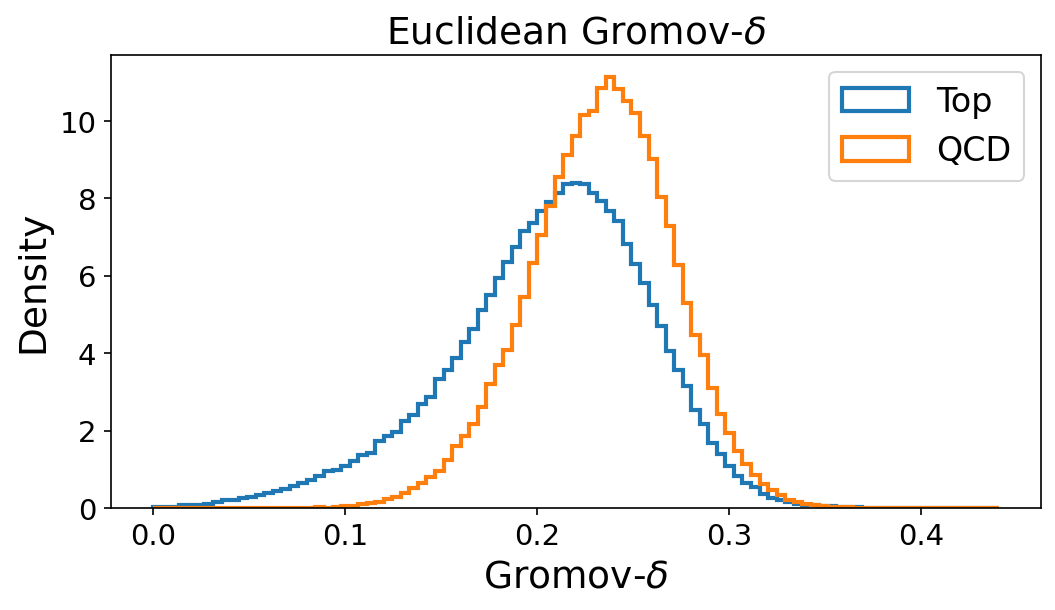

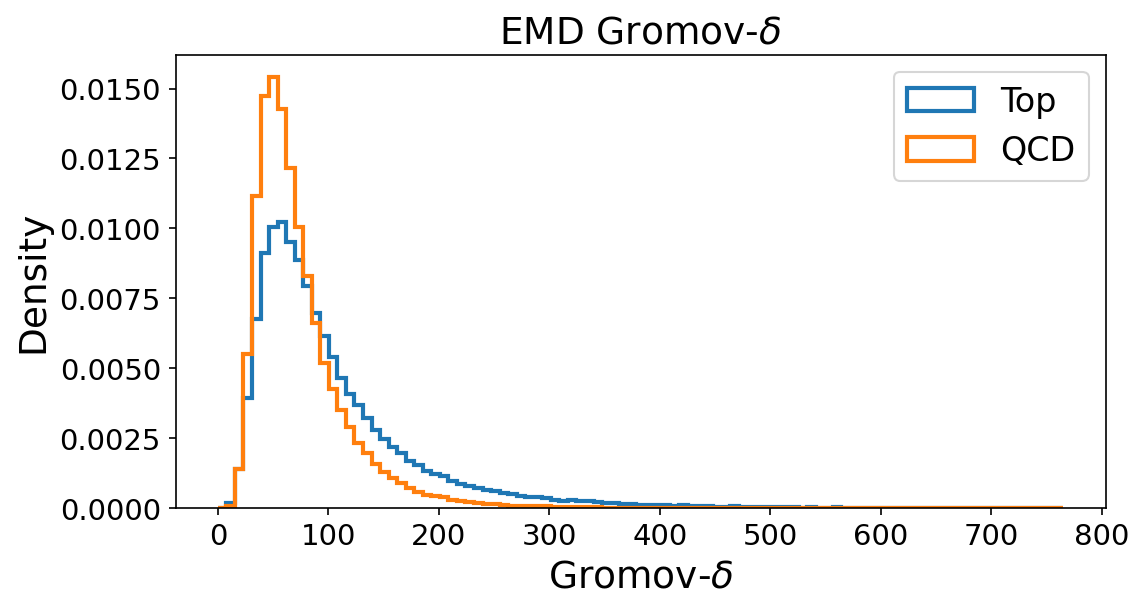

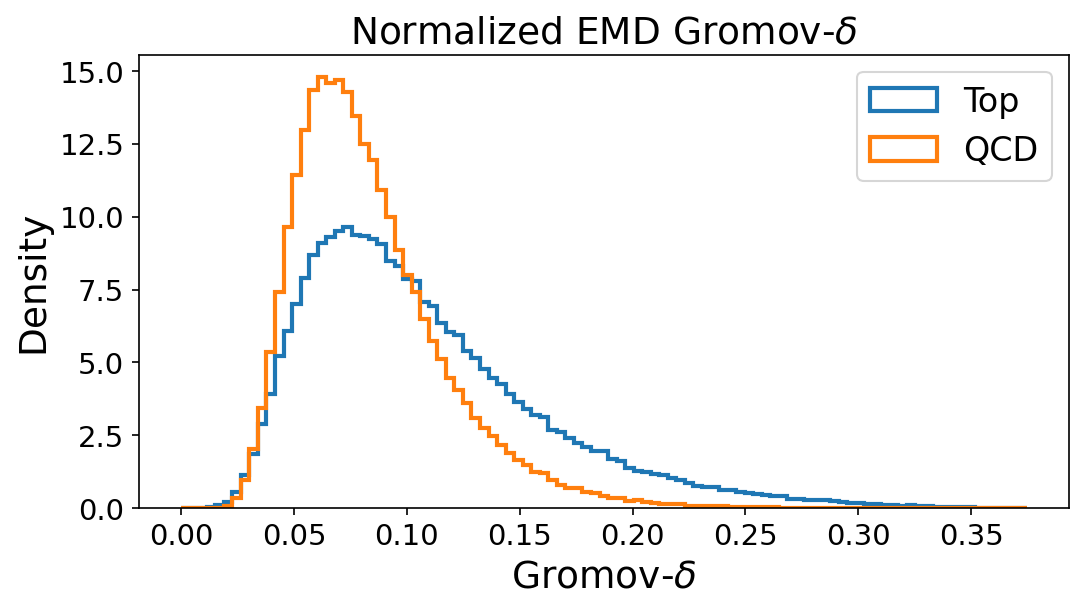

In [25]:
top_jets = gromov_data[gromov_data['jet_label']==1]
qcd_jets = gromov_data[gromov_data['jet_label']==0]

plot_gromov_hist(top_jets['rel_delta'], qcd_jets['rel_delta'], 'Top', 'QCD','Euclidean Gromov-$\delta$')

top_jets = gromov_data_EMD[gromov_data['jet_label']==1]
qcd_jets = gromov_data_EMD[gromov_data['jet_label']==0]

plot_gromov_hist(top_jets['delta'], qcd_jets['delta'], 'Top', 'QCD','EMD Gromov-$\delta$')


top_jets = gromov_data_norm_EMD[gromov_data['jet_label']==1]
qcd_jets = gromov_data_norm_EMD[gromov_data['jet_label']==0]

plot_gromov_hist(top_jets['delta'], qcd_jets['delta'], 'Top', 'QCD','Normalized EMD Gromov-$\delta$')


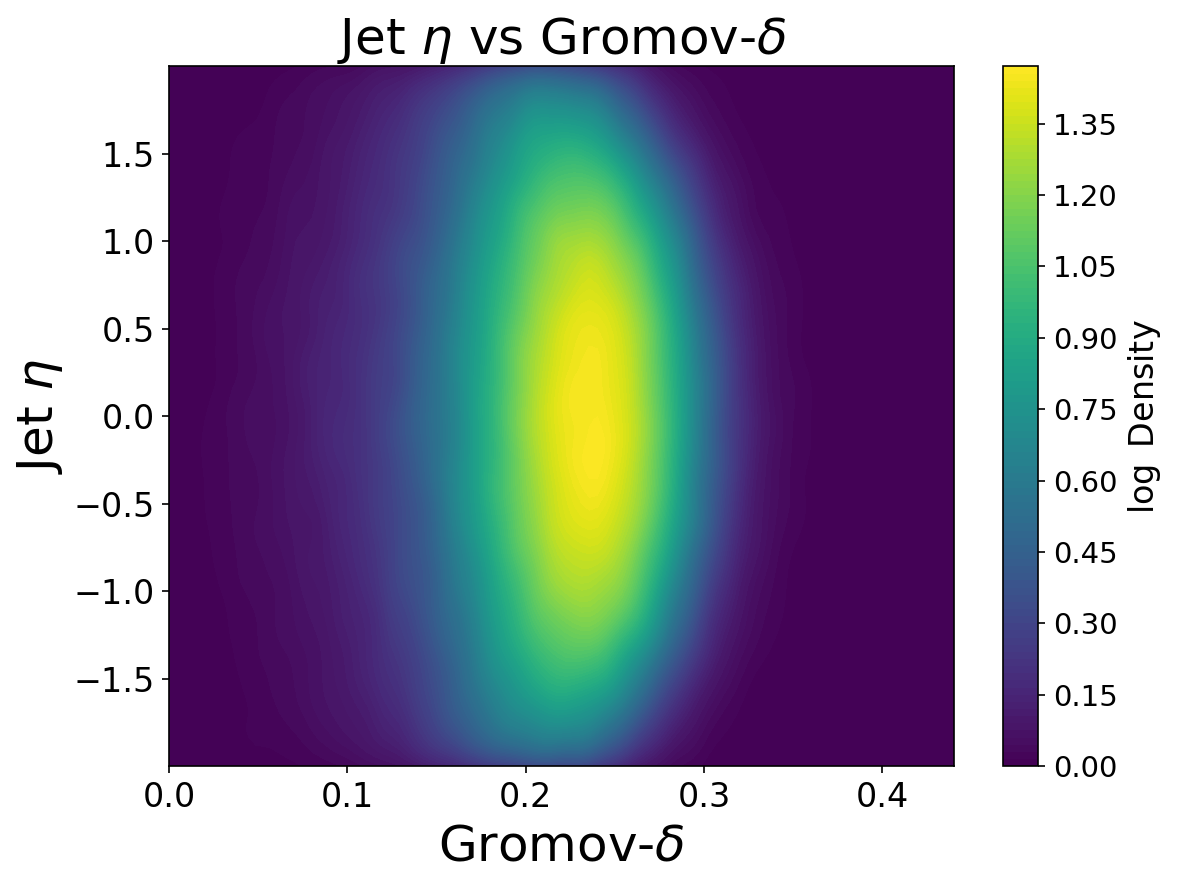

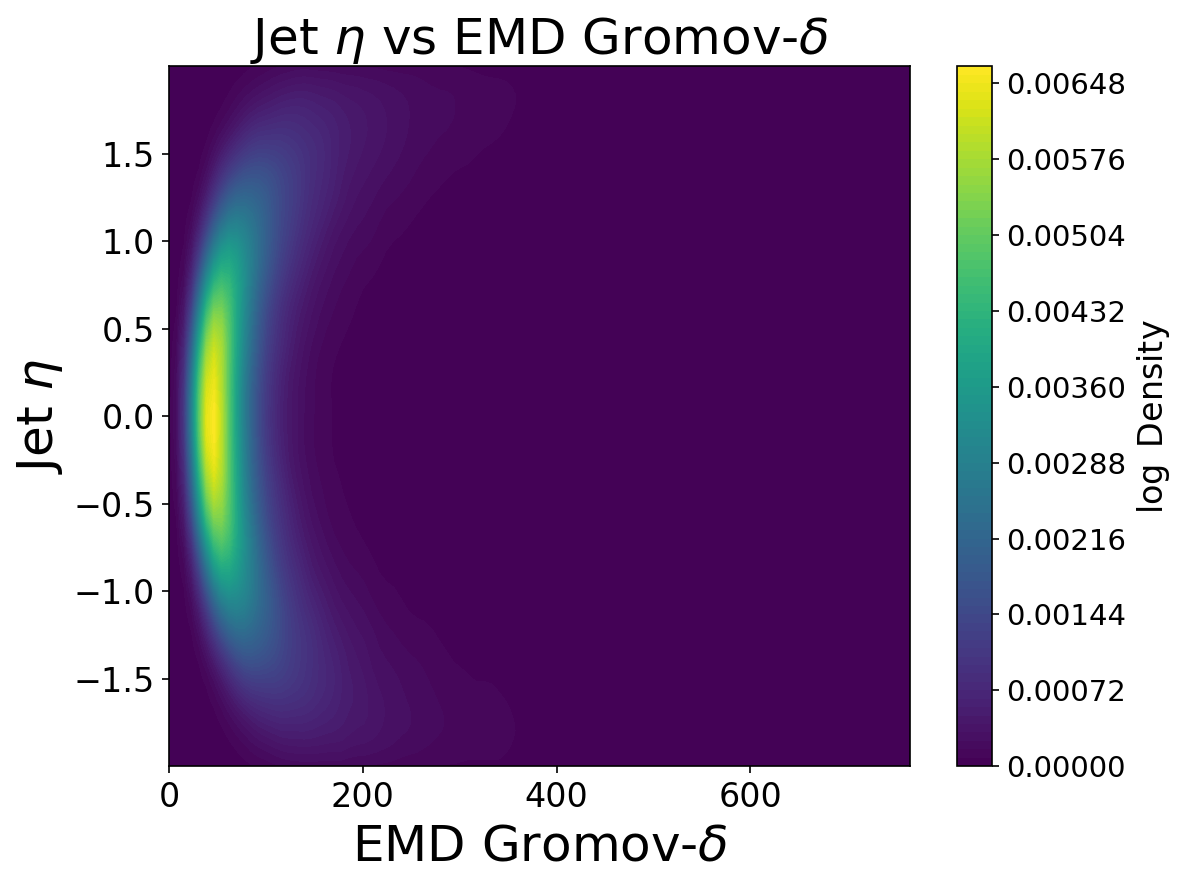

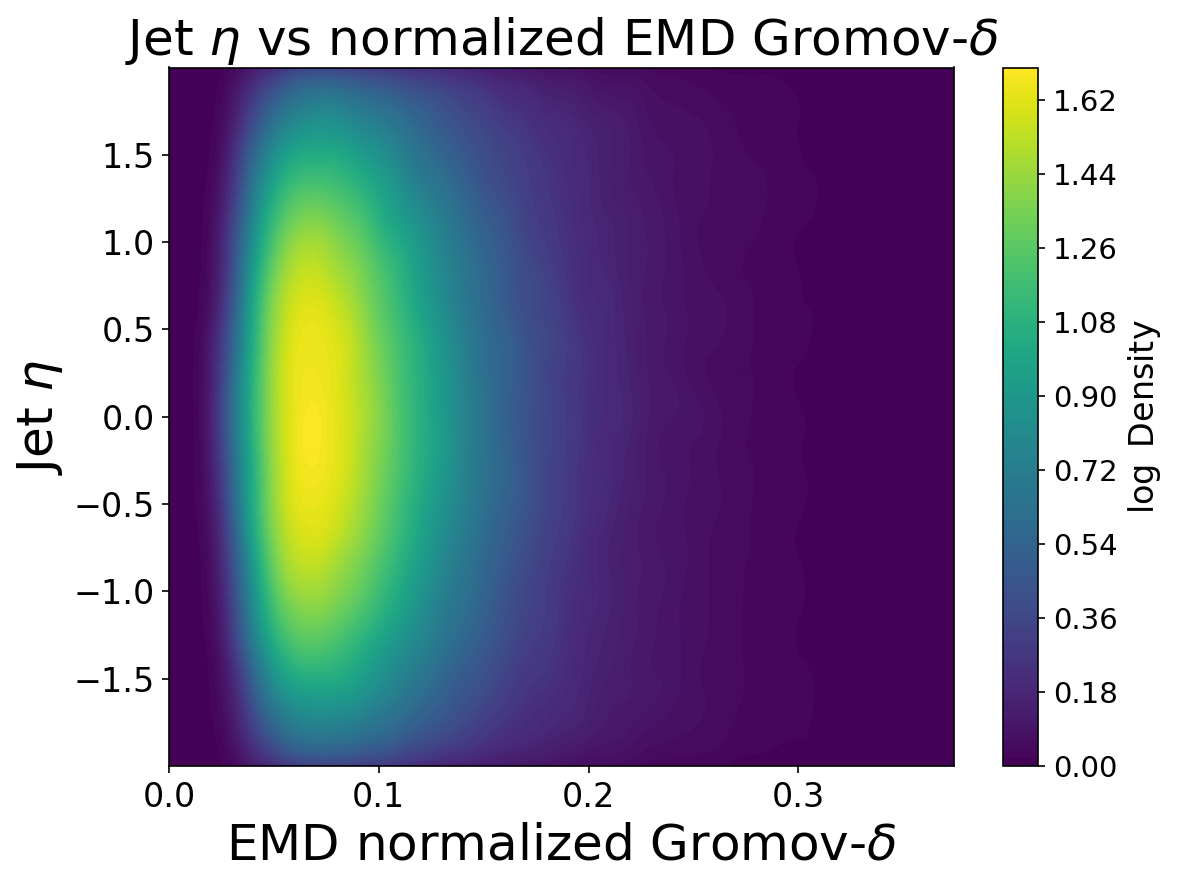

In [22]:
plot_gromov_heatmap(gromov_data['rel_delta'], gromov_data['jet_eta'], f'Jet $\\eta$', f'Gromov-$\\delta$',f'Jet $\\eta$ vs Gromov-$\\delta$')

plot_gromov_heatmap(gromov_data_EMD['delta'], gromov_data_EMD['jet_eta'], f'Jet $\\eta$', f'EMD Gromov-$\\delta$',f'Jet $\\eta$ vs EMD Gromov-$\\delta$')

plot_gromov_heatmap(gromov_data_norm_EMD['delta'], gromov_data_norm_EMD['jet_eta'], f'Jet $\\eta$', f'EMD normalized Gromov-$\\delta$',f'Jet $\\eta$ vs normalized EMD Gromov-$\\delta$')



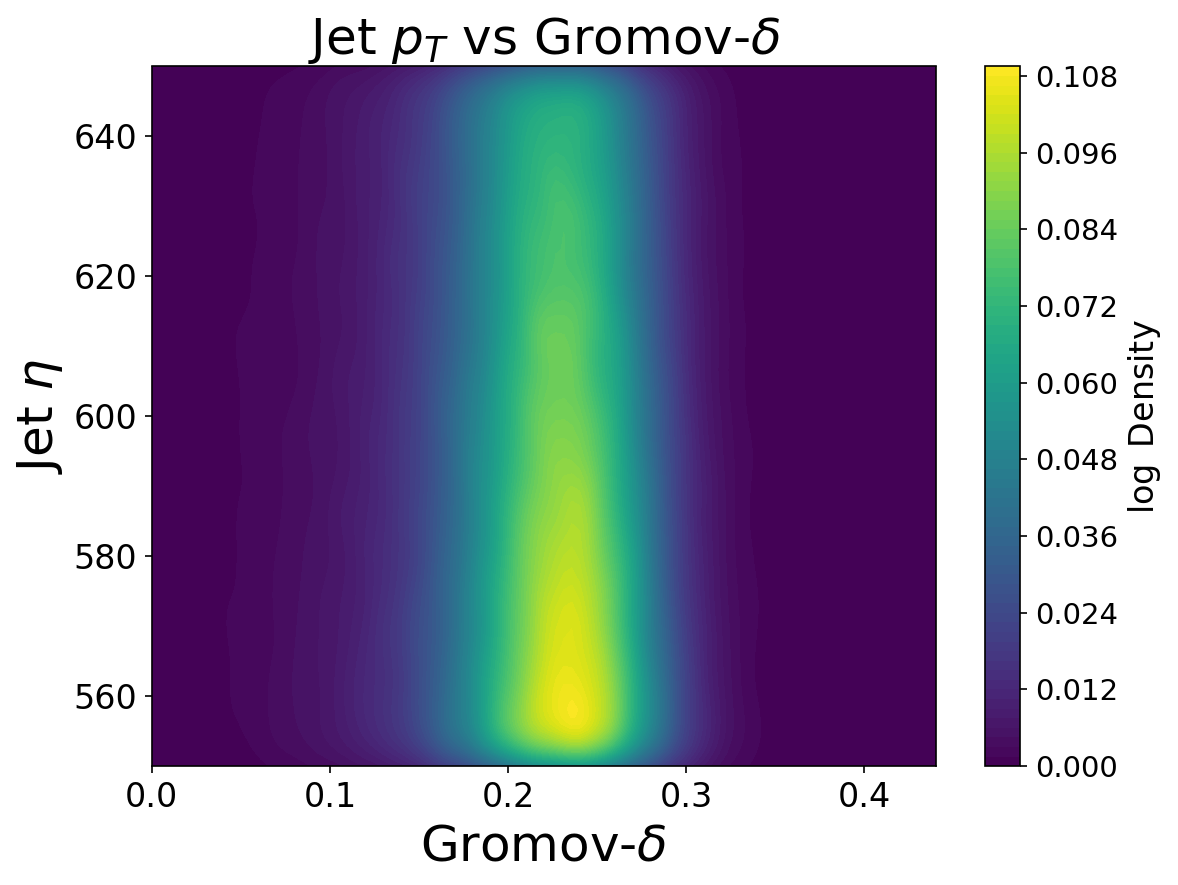

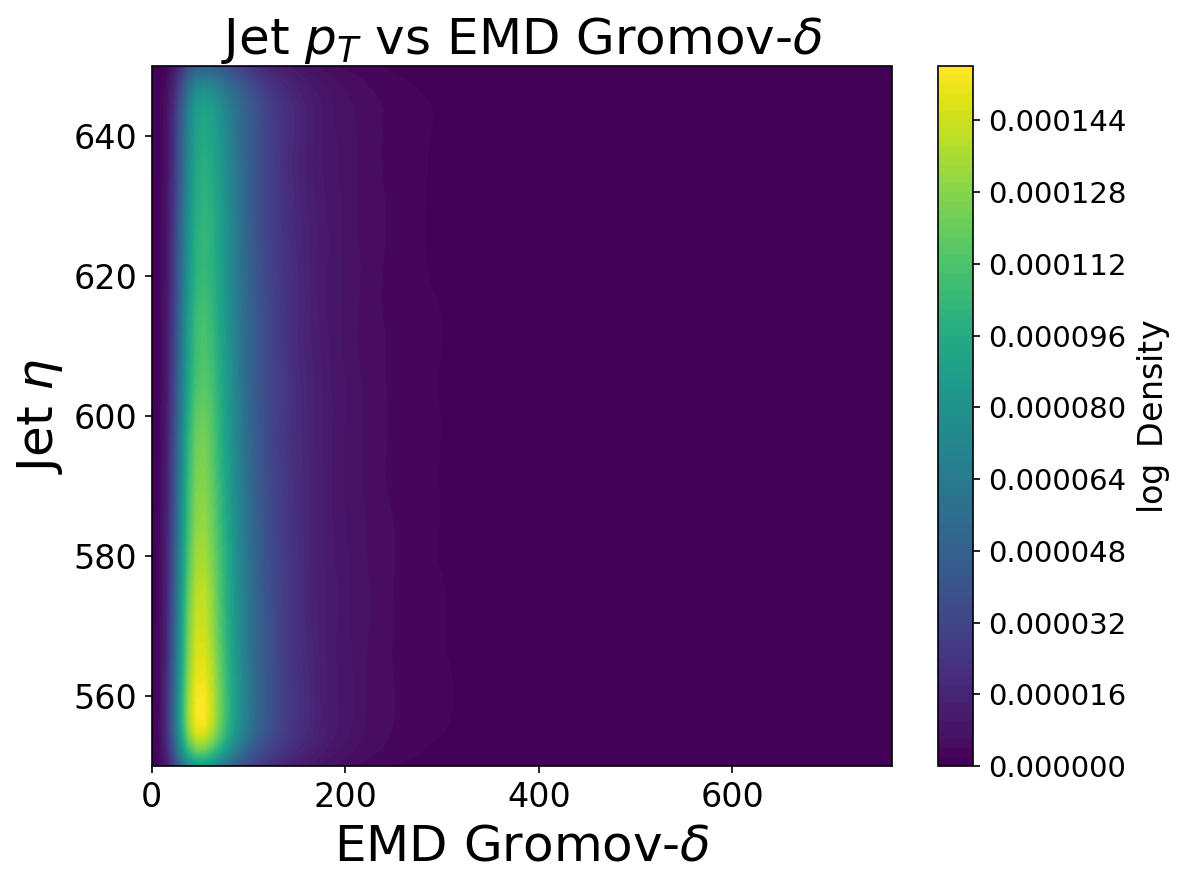

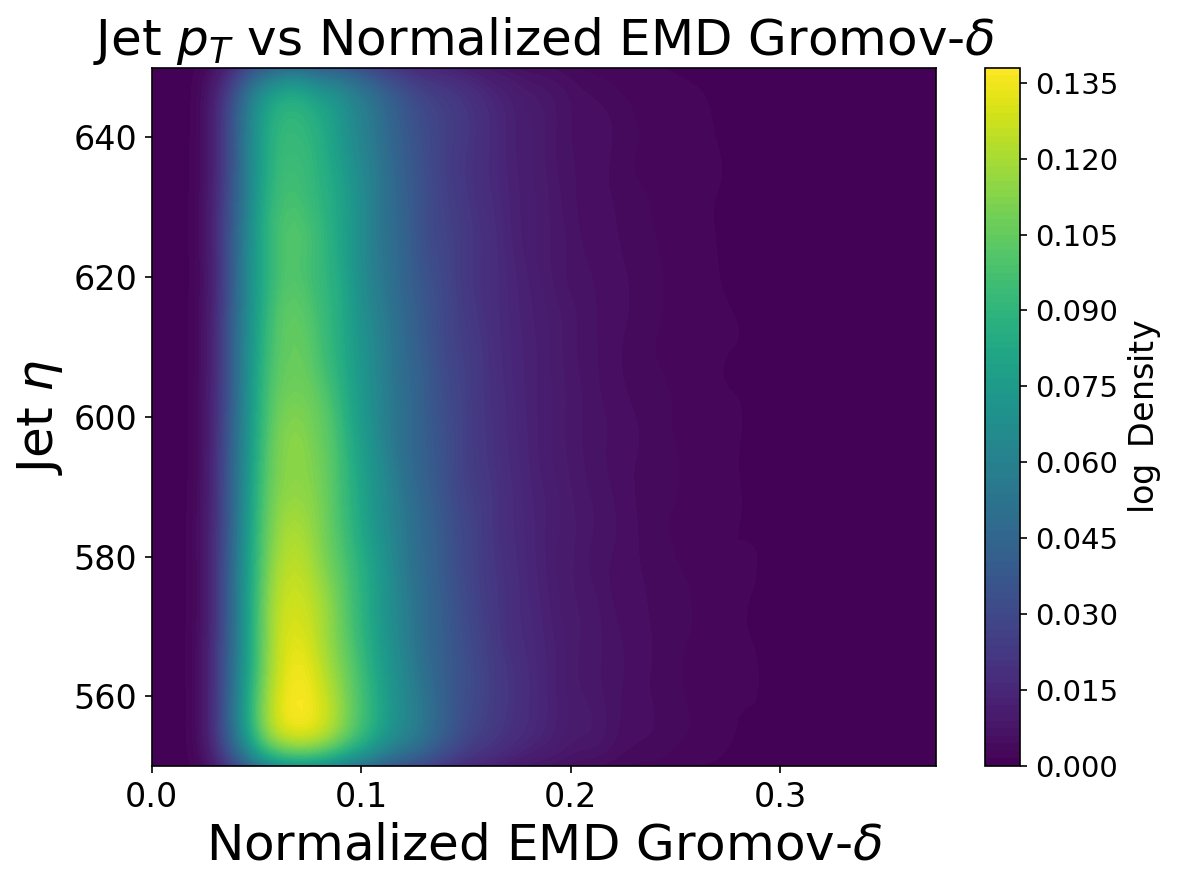

In [23]:
plot_gromov_heatmap(gromov_data['rel_delta'], gromov_data['jet_pt'], f'Jet $\\eta$', f'Gromov-$\\delta$',f'Jet $p_T$ vs Gromov-$\\delta$')

plot_gromov_heatmap(gromov_data_EMD['delta'], gromov_data_EMD['jet_pt'],  f'Jet $\\eta$', f'EMD Gromov-$\\delta$',f'Jet $p_T$ vs EMD Gromov-$\\delta$')

plot_gromov_heatmap(gromov_data_norm_EMD['delta'], gromov_data_norm_EMD['jet_pt'], f'Jet $\\eta$', f'Normalized EMD Gromov-$\\delta$',f'Jet $p_T$ vs Normalized EMD Gromov-$\\delta$')

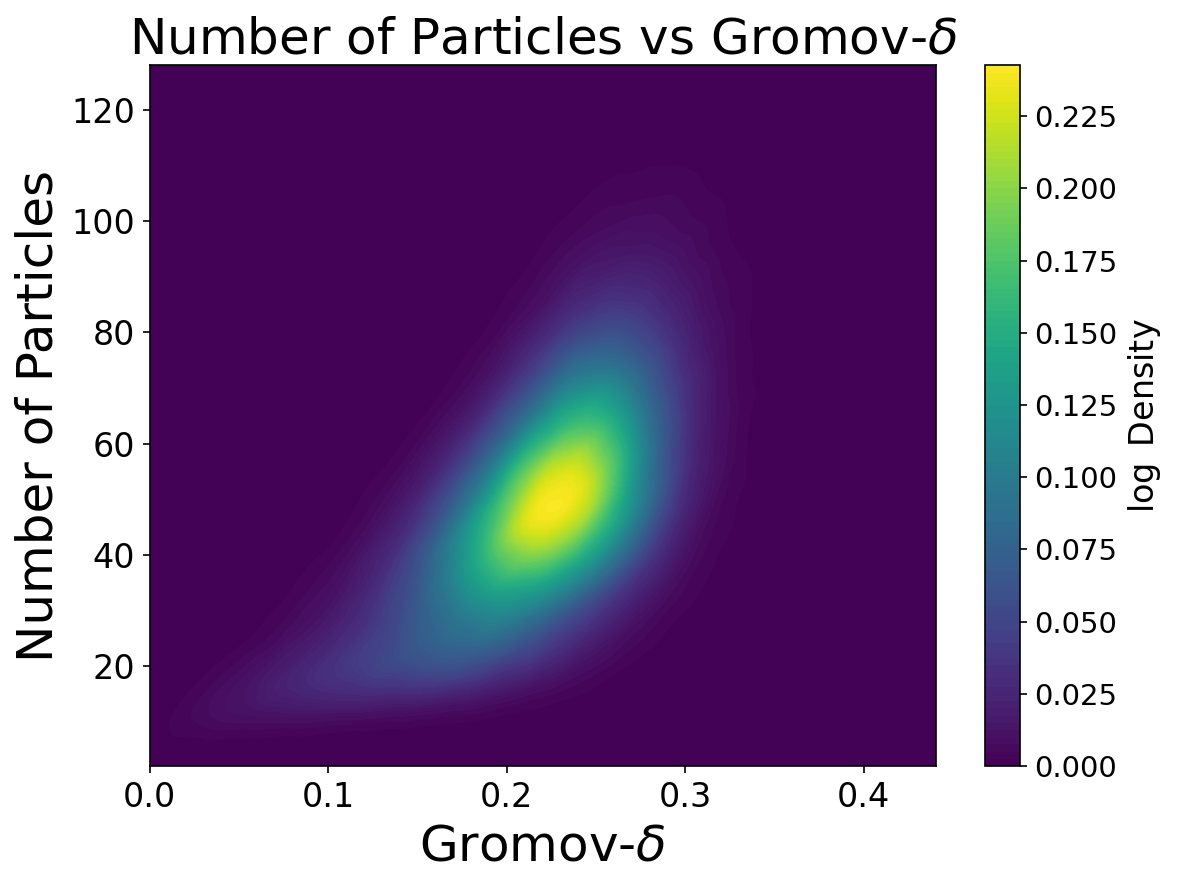

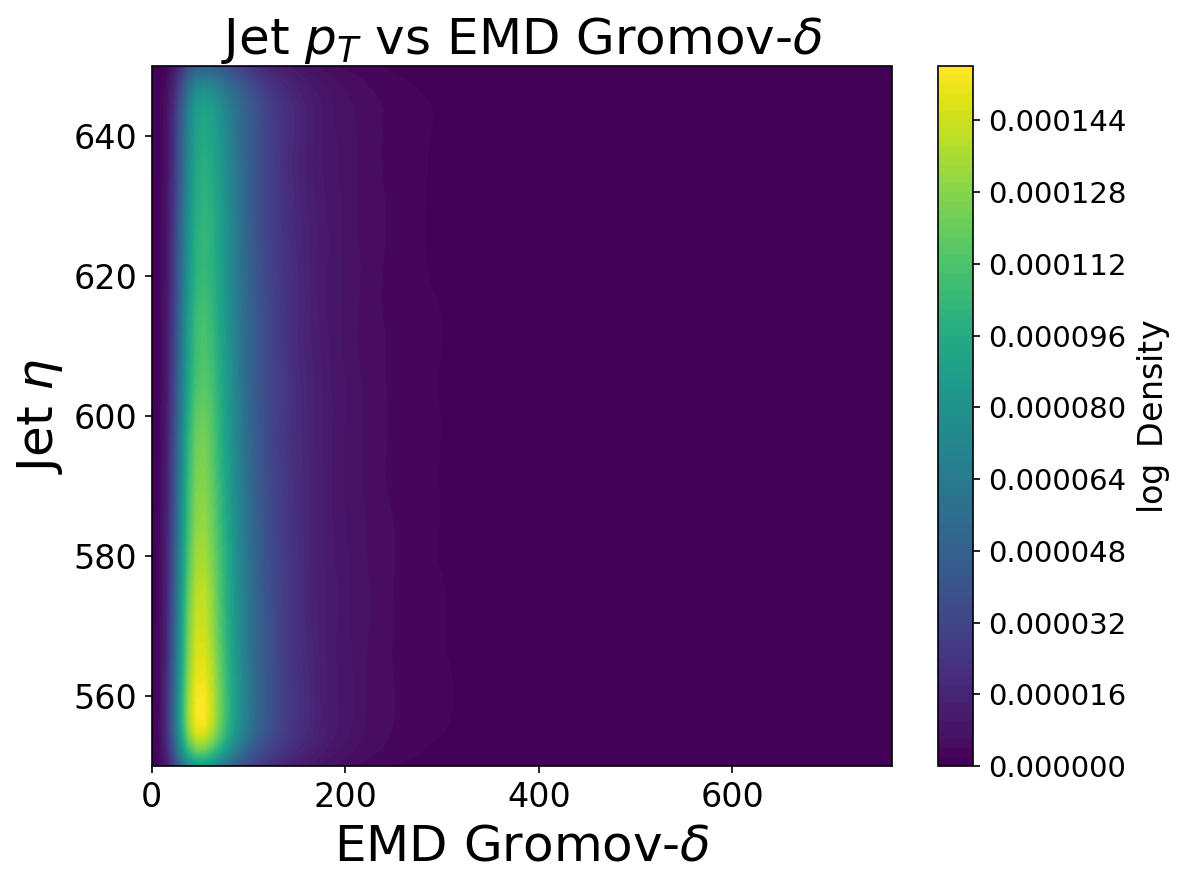

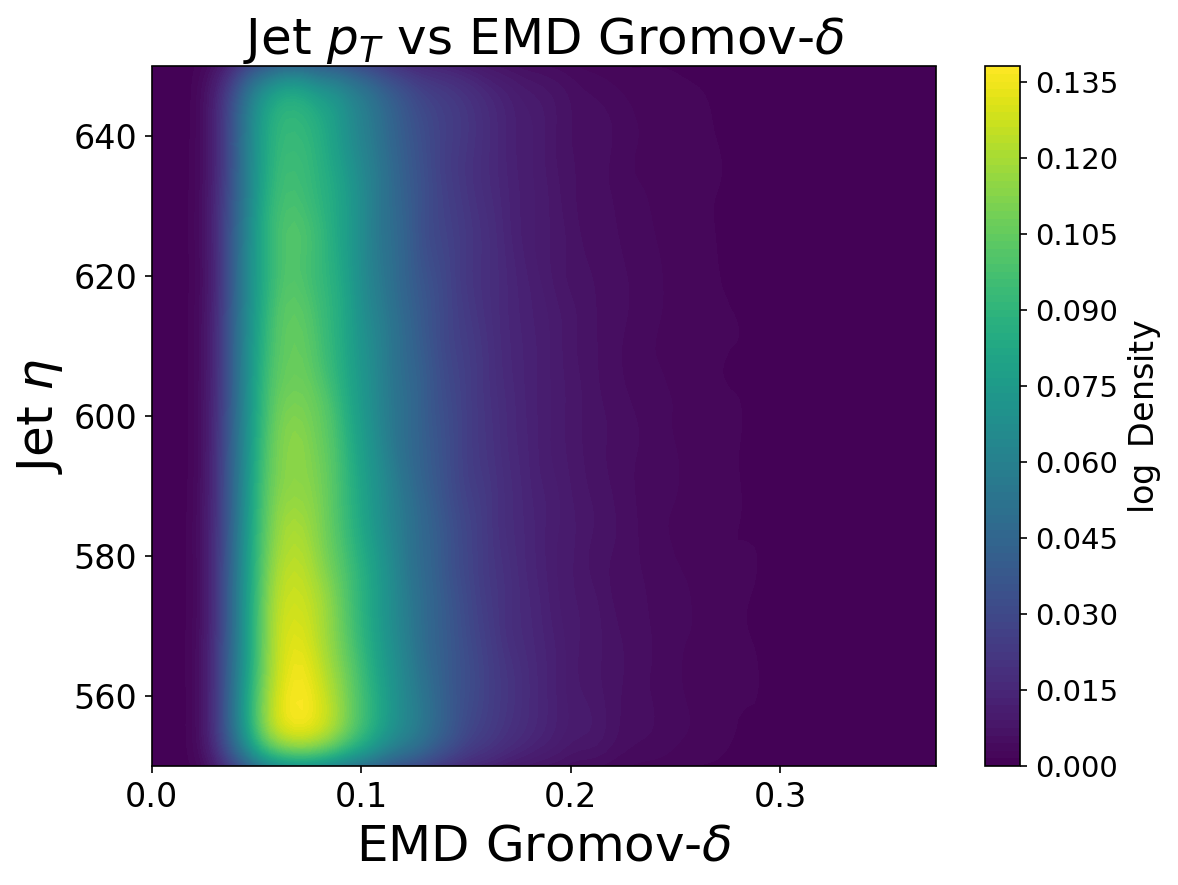

In [24]:
plot_gromov_heatmap(gromov_data['rel_delta'], gromov_data['jet_nparts'], f'Number of Particles', f'Gromov-$\\delta$',f'Number of Particles vs Gromov-$\\delta$')

plot_gromov_heatmap(gromov_data_EMD['delta'], gromov_data_EMD['jet_pt'],  f'Jet $\\eta$', f'EMD Gromov-$\\delta$',f'Jet $p_T$ vs EMD Gromov-$\\delta$')

plot_gromov_heatmap(gromov_data_norm_EMD['delta'], gromov_data_norm_EMD['jet_pt'], f'Jet $\\eta$', f'EMD Gromov-$\\delta$',f'Jet $p_T$ vs EMD Gromov-$\\delta$')



### Top Model Performance Relative to Gromov 

In [39]:
# (R,R)
# test_path = '/n/holystore01/LABS/iaifi_lab/Lab/nswood/training/TopLandscape/PMTrans/20241220-131744_example_PMTransformer_e2e271107d6c1f08b0a8cc7a12c8ef5c_r_adam_lr0.0005_batch128PMTrans_R_128_R_96_partD128_jetD96_layers8_nheads4_redo_2/predict_output/pred.root'

# (RxH, RxH)
test_path = '/n/holystore01/LABS/iaifi_lab/Lab/nswood/training/TopLandscape/PMTrans/20241205-061806_example_PMTransformer_34572cf6ff96687d980a950698050b91_r_adam_lr0.0005_batch128PMTrans_RxH_4_RxH_4_partD8_jetD8_layers1_nheads1_redo_3_smaller/predict_output/pred.root'

df = read_root_file(test_path)

In [42]:

qcd_jets = df[df['jet_isQCD']]
top_jets = df[df['jet_isTop']]
common_indices = top_jets.index.intersection(gromov_data.index)

# Assign the filtered gromov_data to the new column
top_jets = top_jets.loc[common_indices]
# top_jets['gromov_d'] = gromov_data['rel_delta'].loc[common_indices]
top_jets['gromov_d'] = gromov_data_EMD['delta'].loc[common_indices]


common_indices = qcd_jets.index.intersection(gromov_data.index)

# Assign the filtered gromov_data to the new column
qcd_jets = qcd_jets.loc[common_indices]
# qcd_jets['gromov_d'] = gromov_data['rel_delta'].loc[common_indices]
qcd_jets['gromov_d'] = gromov_data_EMD['delta'].loc[common_indices]

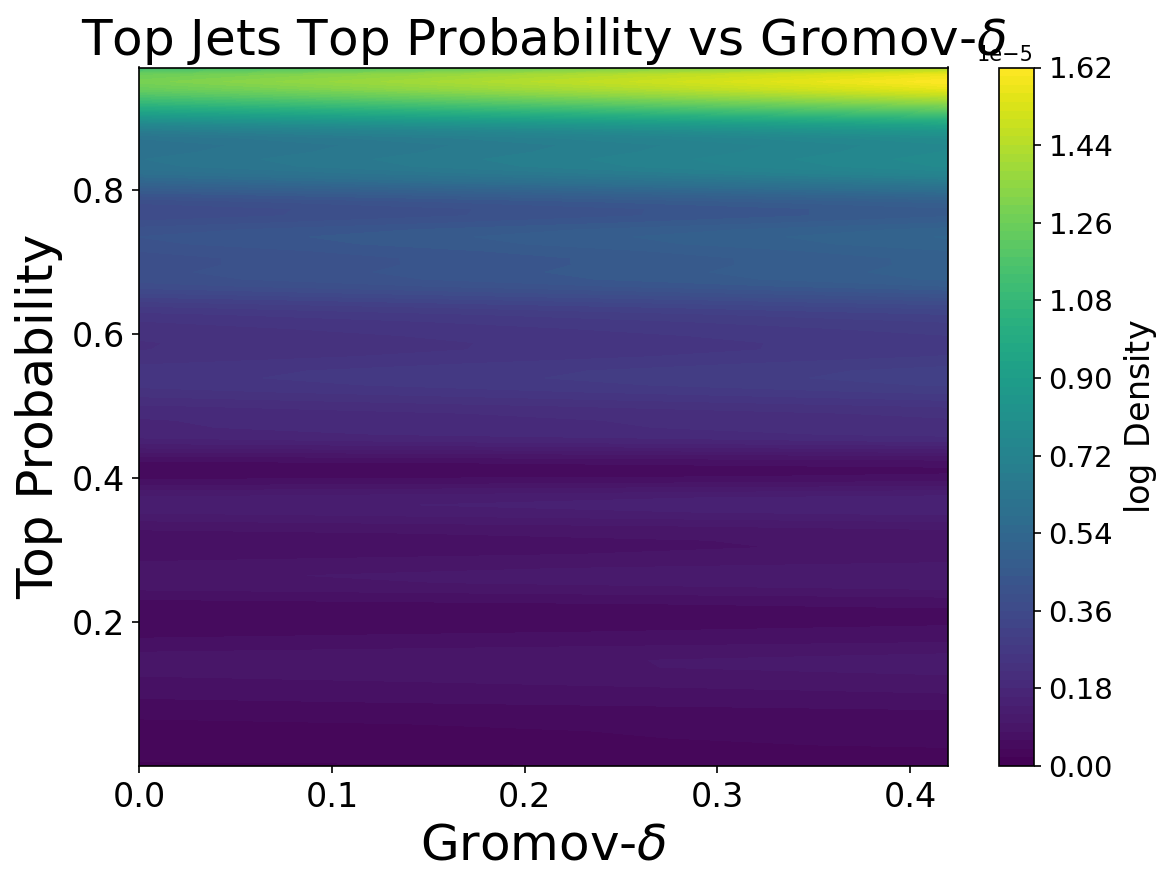

In [43]:
rel_delta = top_jets['gromov_d']
top_pred = top_jets['score_jet_isTop']

mask = ~np.isnan(rel_delta)

rel_delta = rel_delta[mask]
top_pred = top_pred[mask]

# Create a 2D grid for KDE
x = rel_delta
y = top_pred

# Define grid points for smooth heatmap
x_grid = np.linspace(0, 0.42, 100)
y_grid = np.linspace(y.min(), y.max(), 100)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)

# Perform KDE
kde = gaussian_kde([x, y])
z = kde(np.vstack([x_mesh.ravel(), y_mesh.ravel()]))
z = np.log1p(z) 
# Reshape the KDE output for plotting
z = z.reshape(x_mesh.shape)

# Plot the smooth heatmap
fig = plt.figure(figsize=(8, 6),dpi=150)
fig.patch.set_facecolor('white')
plt.contourf(x_mesh, y_mesh, z, levels=100, cmap='viridis')
colorbar =plt.colorbar(label='Density')
colorbar.ax.tick_params(labelsize=14)
colorbar.set_label(f'$\log$ Density', size=16)  
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)

# Labels and title
plt.xlabel(f'Gromov-$\\delta$', fontsize=24)
plt.ylabel(f'Top Probability', fontsize=24)
plt.title(f'Top Jets Top Probability vs Gromov-$\\delta$', fontsize=24)

plt.tight_layout()
plt.show()

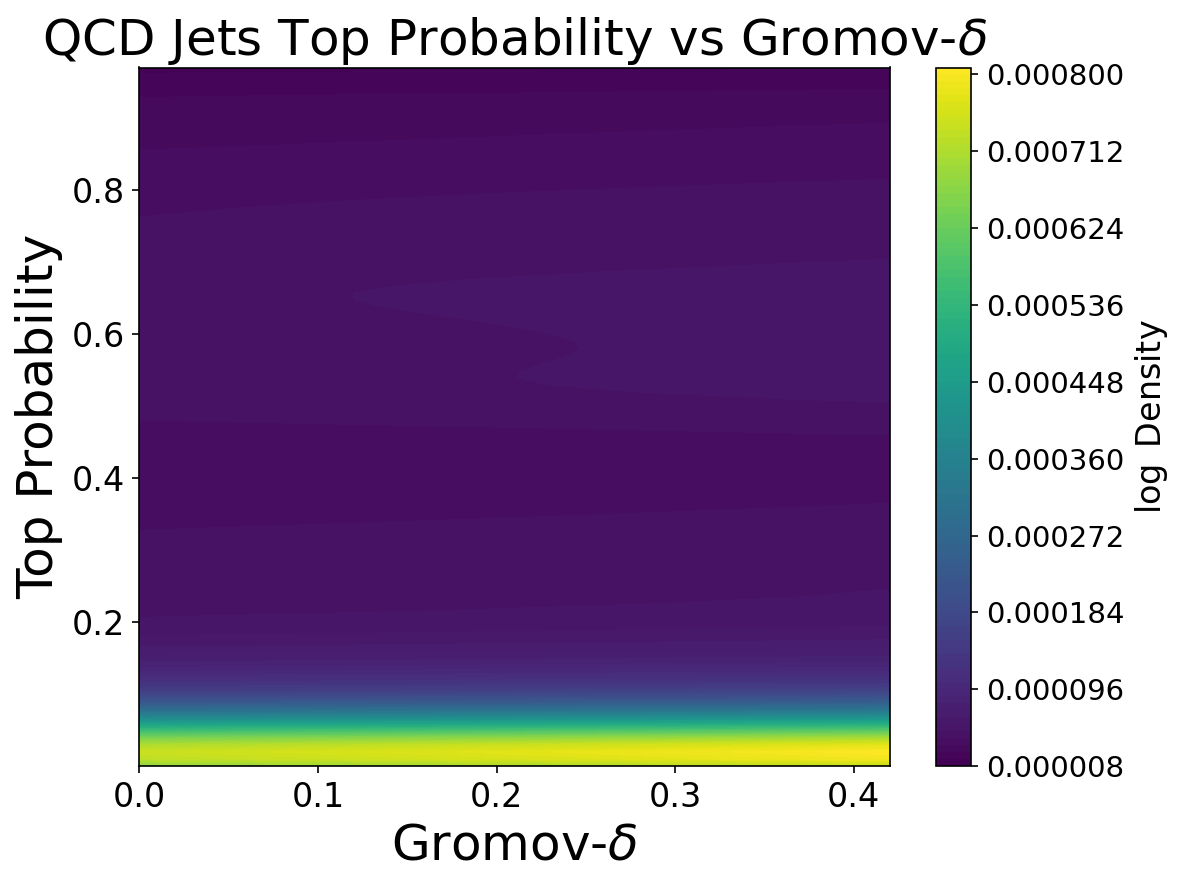

In [44]:
rel_delta = qcd_jets['gromov_d']
top_pred = qcd_jets['score_jet_isTop']

mask = ~np.isnan(rel_delta)

rel_delta = rel_delta[mask]
top_pred = top_pred[mask]

# Create a 2D grid for KDE
x = rel_delta
y = top_pred

# Define grid points for smooth heatmap
x_grid = np.linspace(0, 0.42, 100)
y_grid = np.linspace(y.min(), y.max(), 100)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)

# Perform KDE
kde = gaussian_kde([x, y])
z = kde(np.vstack([x_mesh.ravel(), y_mesh.ravel()]))

z = np.log1p(z) 

# Reshape the KDE output for plotting
z = z.reshape(x_mesh.shape)

# Plot the smooth heatmap
fig = plt.figure(figsize=(8, 6),dpi=150)
fig.patch.set_facecolor('white')
plt.contourf(x_mesh, y_mesh, z, levels=100, cmap='viridis')
colorbar =plt.colorbar(label='Density')
colorbar.ax.tick_params(labelsize=14)
colorbar.set_label(f'$\log$ Density', size=16)  
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
# Labels and title
plt.xlabel(f'Gromov-$\\delta$', fontsize=24)
plt.ylabel(f'Top Probability', fontsize=24)
plt.title(f'QCD Jets Top Probability vs Gromov-$\\delta$', fontsize=24)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np 
percentiles = [50, 75, 90, 95, 99]

# Calculate percentiles
percentile_values = np.percentile(, percentiles)
cur_mask = curvatures

In [ ]:
percentiles = [50, 75, 90, 95, 99]

curvatures = gromov_data['c'].to_numpy()

percentile_values = np.percentile(curvatures, percentiles)

cur_mask = (~np.isnan(curvatures)) & (curvatures > percentile_values[0])

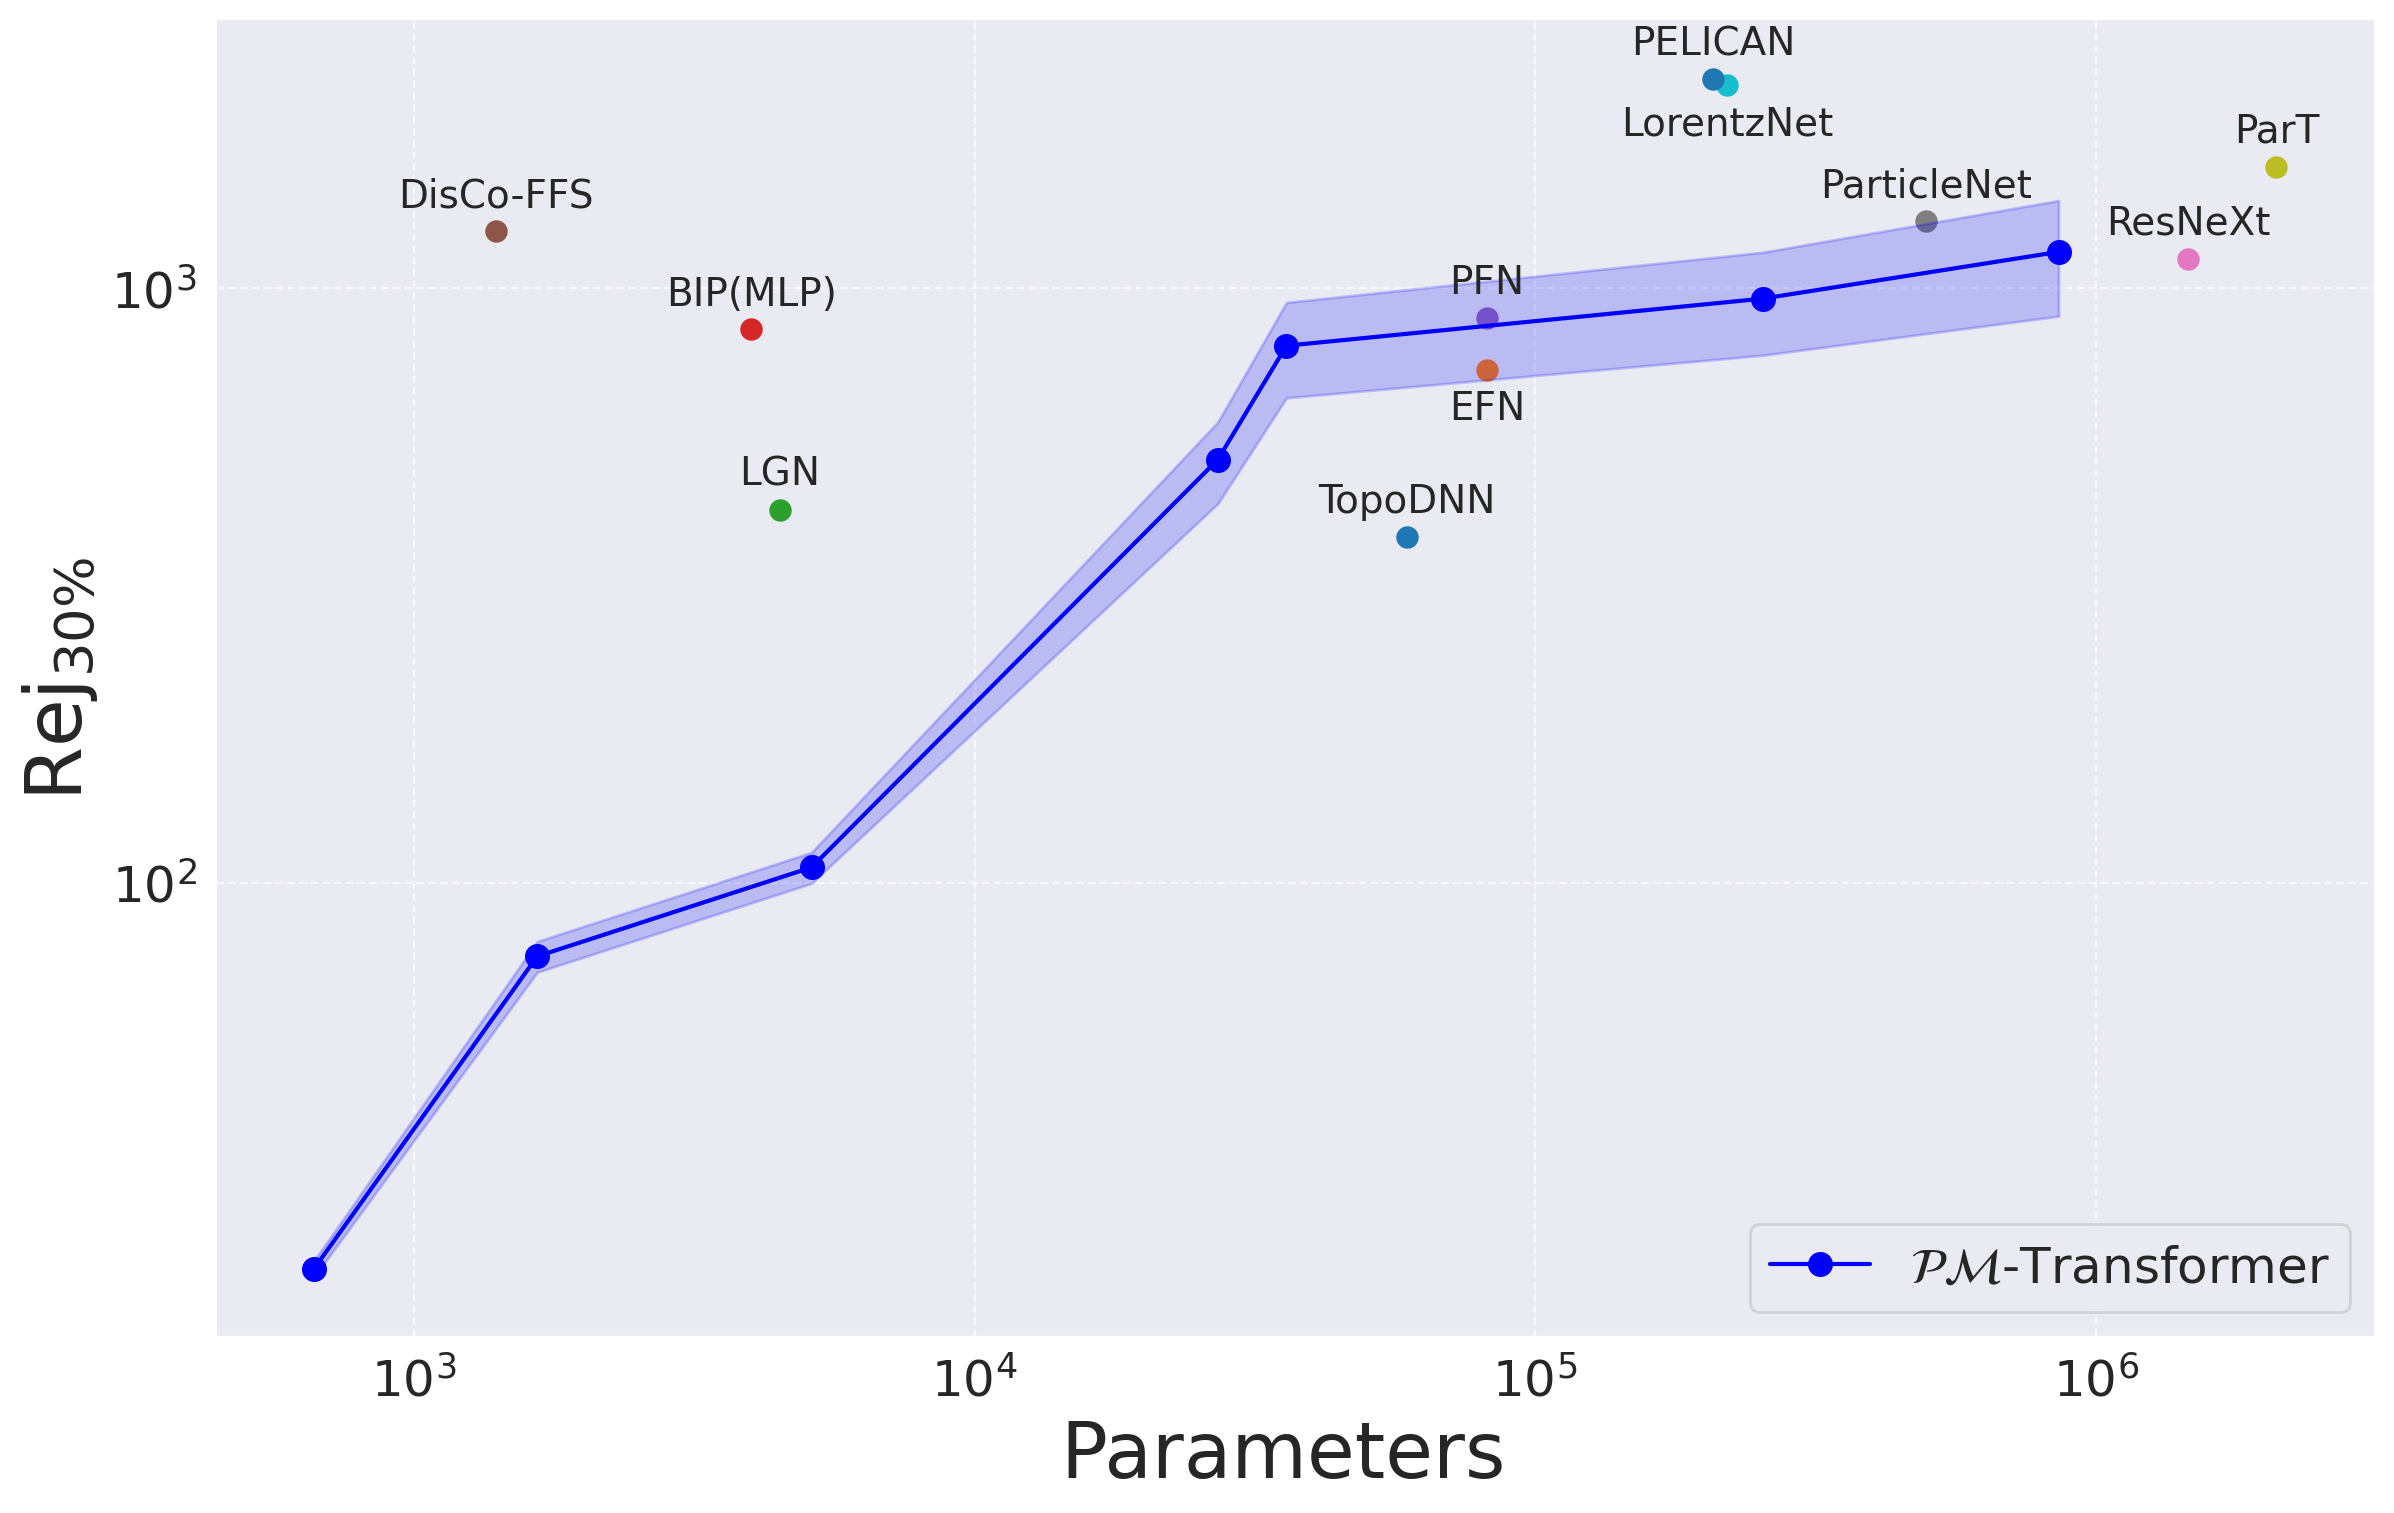

      params  overall_auc  accuracy_mean  overall_accuracy  accuracy_std  \
18     664.0     0.908910       0.861867          0.862156      0.001676   
10    1660.0     0.951785       0.899170          0.899128      0.001402   
9     5120.0     0.958407       0.903413          0.903520      0.001503   
5    27160.0     0.978248       0.926500          0.926507      0.001348   
7    36010.0     0.981249       0.930892          0.931064      0.001074   
19  254550.0     0.982586       0.934186          0.934178      0.001165   
28  858190.0     0.984272       0.937554          0.937700      0.001086   

    Top_rejection_50_mean  Top_rejection_50_std  Top_rejection_50_full  \
18              13.480469              0.291116              13.470812   
10              34.219623              1.336649              33.872505   
9               43.569433              1.742347              43.469107   
5              157.726561             12.725387             159.489731   
7              217.80

In [ ]:

# warnings.filterwarnings('ignore')
#

# Load the DataFrame
results_df = pd.read_csv('top_PMTrans_benchmark.csv').sort_values('overall_accuracy', ascending=False)

results_df['base_name'] = results_df['model_id'].str.split('batch128').str[1].str.split('_redo').str[0]

split_columns = results_df['base_name'].str.split('_final', expand=True)[0].str.split('_', expand=True).iloc[:, [1,2,3,4,7,8]]
results_df[['particle_geom', 'particle_dim','jet_geom','jet_dim','layers','heads']] = split_columns
results_df['layers'] = results_df['layers'].str[-1]
results_df['heads'] = results_df['heads'].str.split('nheads').str[1]


param_map = {'RxH_2_RxH_2_partD4_jetD4_layers1_nheads1': 664.0,
  'RxH_120_RxH_128_partD240_jetD256_layers4_nheads12': 1380000.0,
  'RxH_2_RxH_6_partD4_jetD12_layers2_nheads1': 1490.0,
  'RxH_4_RxH_4_partD8_jetD8_layers1_nheads1': 1660.0,
  'RxH_5_RxH_12_partD10_jetD24_layers2_nheads1': 5120.0,
  'RxH_120_RxH_128_partD240_jetD256_layers8_nheads12': 2029999.9999999998,
  'RxH_40_RxH_48_partD80_jetD96_layers8_nheads4': 254550.0,
  'RxH_10_RxH_24_partD20_jetD48_layers2_nheads1': 27160.0,
  'RxH_10_RxH_24_partD20_jetD48_layers8_nheads1': 36010.0,
  'RxH_20_RxH_32_partD40_jetD64_layers8_nheads2': 83380.0,
  'RxH_80_RxH_64_partD160_jetD128_layers8_nheads8': 858190.0} 

# Group by the columns and select the rows with the maximum 'overall_accuracy' for each group
best_rows_df = results_df.loc[results_df.groupby(['base_name'])['overall_accuracy'].idxmax()]
best_rows_df['params'] = best_rows_df['base_name'].str.split('PMTrans_').str[1].map(param_map)


result = best_rows_df.sort_values(by='params')[['params','overall_auc','accuracy_mean',
                                                'overall_accuracy','accuracy_std','Top_rejection_50_mean',
                                                'Top_rejection_50_std','Top_rejection_50_full','Top_rejection_30_full',
                                                'Top_rejection_30_mean','Top_rejection_30_std',
                                               'particle_geom', 'particle_dim','jet_geom','jet_dim','layers','heads']]
result= result[(result['params'] != 83380.0) & (result['params'] <= 1000000.0) & (result['params'] != 1490.0)]
# result= result[(result['params'] != 83380.0)]



# Manually input the data
data = {
    "Architecture": [
        "TopoDNN", "EFN", "LGN",  "BIP(MLP)", 
        "PFN", "DisCo-FFS", "ResNeXt", "ParticleNet", "ParT", 
        "LorentzNet", "PELICAN", 
    ],
    "Accuracy": [
        0.916, 0.927, 0.929,   0.931, 
        0.932, None, 0.936, 0.938, 0.940, 0.942, 
        0.9426, 0.9406
    ],
    "Params": [
        59000, 82000, 4500,  4000, 
        82000, 1400, 1460000, 498000, 2100000, 
        220000, 208000, 208000
    ],
    "rej_30": [
        382, 729, 424, 853, 
        891, 1249, 1122, 1298, 1602, 2195, 
        2250
    ]
}


# Create the plot
fig = plt.figure(figsize=(12, 8),dpi =200)
for i, architecture in enumerate(data["Architecture"]):
    x = data["Params"][i]  # Convert parameters to thousands
    y = data["rej_30"][i]
    if y is not None:  # Skip missing accuracies
        plt.scatter(x, y,s = 50)
        if 'Loren' in architecture or 'EFN' in architecture:
            plt.text(x, y*0.825, architecture, fontsize=14, ha='center')
        else:
            plt.text(x, y*1.1, architecture, fontsize=14, ha='center')

# Formatting
plt.xlabel("Parameters ", fontsize=28)
plt.ylabel(f"$\\text{{Rej}}_{{30\%}}$", fontsize=28)
plt.plot(result['params'].to_numpy(),result['Top_rejection_30_mean'].to_numpy(),label = f'$\mathcal{{P}}\mathcal{{M}}$-Transformer',color = 'b',marker='o', markersize = 8)
plt.fill_between(result['params'].to_numpy(), 
                             (result['Top_rejection_30_mean'].to_numpy() - result['Top_rejection_30_std'].to_numpy()),
                             (result['Top_rejection_30_mean'].to_numpy() + result['Top_rejection_30_std'].to_numpy()), 
                             color='blue', alpha=0.2)
# plt.title("Top Tagging: Rej (at 0.3) vs. Parameters", fontsize=16)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xscale('log')
plt.tight_layout()
plt.yscale('log')
plt.legend(ncol = 1,fontsize = 18,loc = 'lower right')
ax = plt.gca()


ax.tick_params(axis='x', which='major', labelsize=18)
ax.tick_params(axis='y', which='major', labelsize=18)
fig.patch.set_facecolor('white')
# Show the plot
plt.show()

print(result)

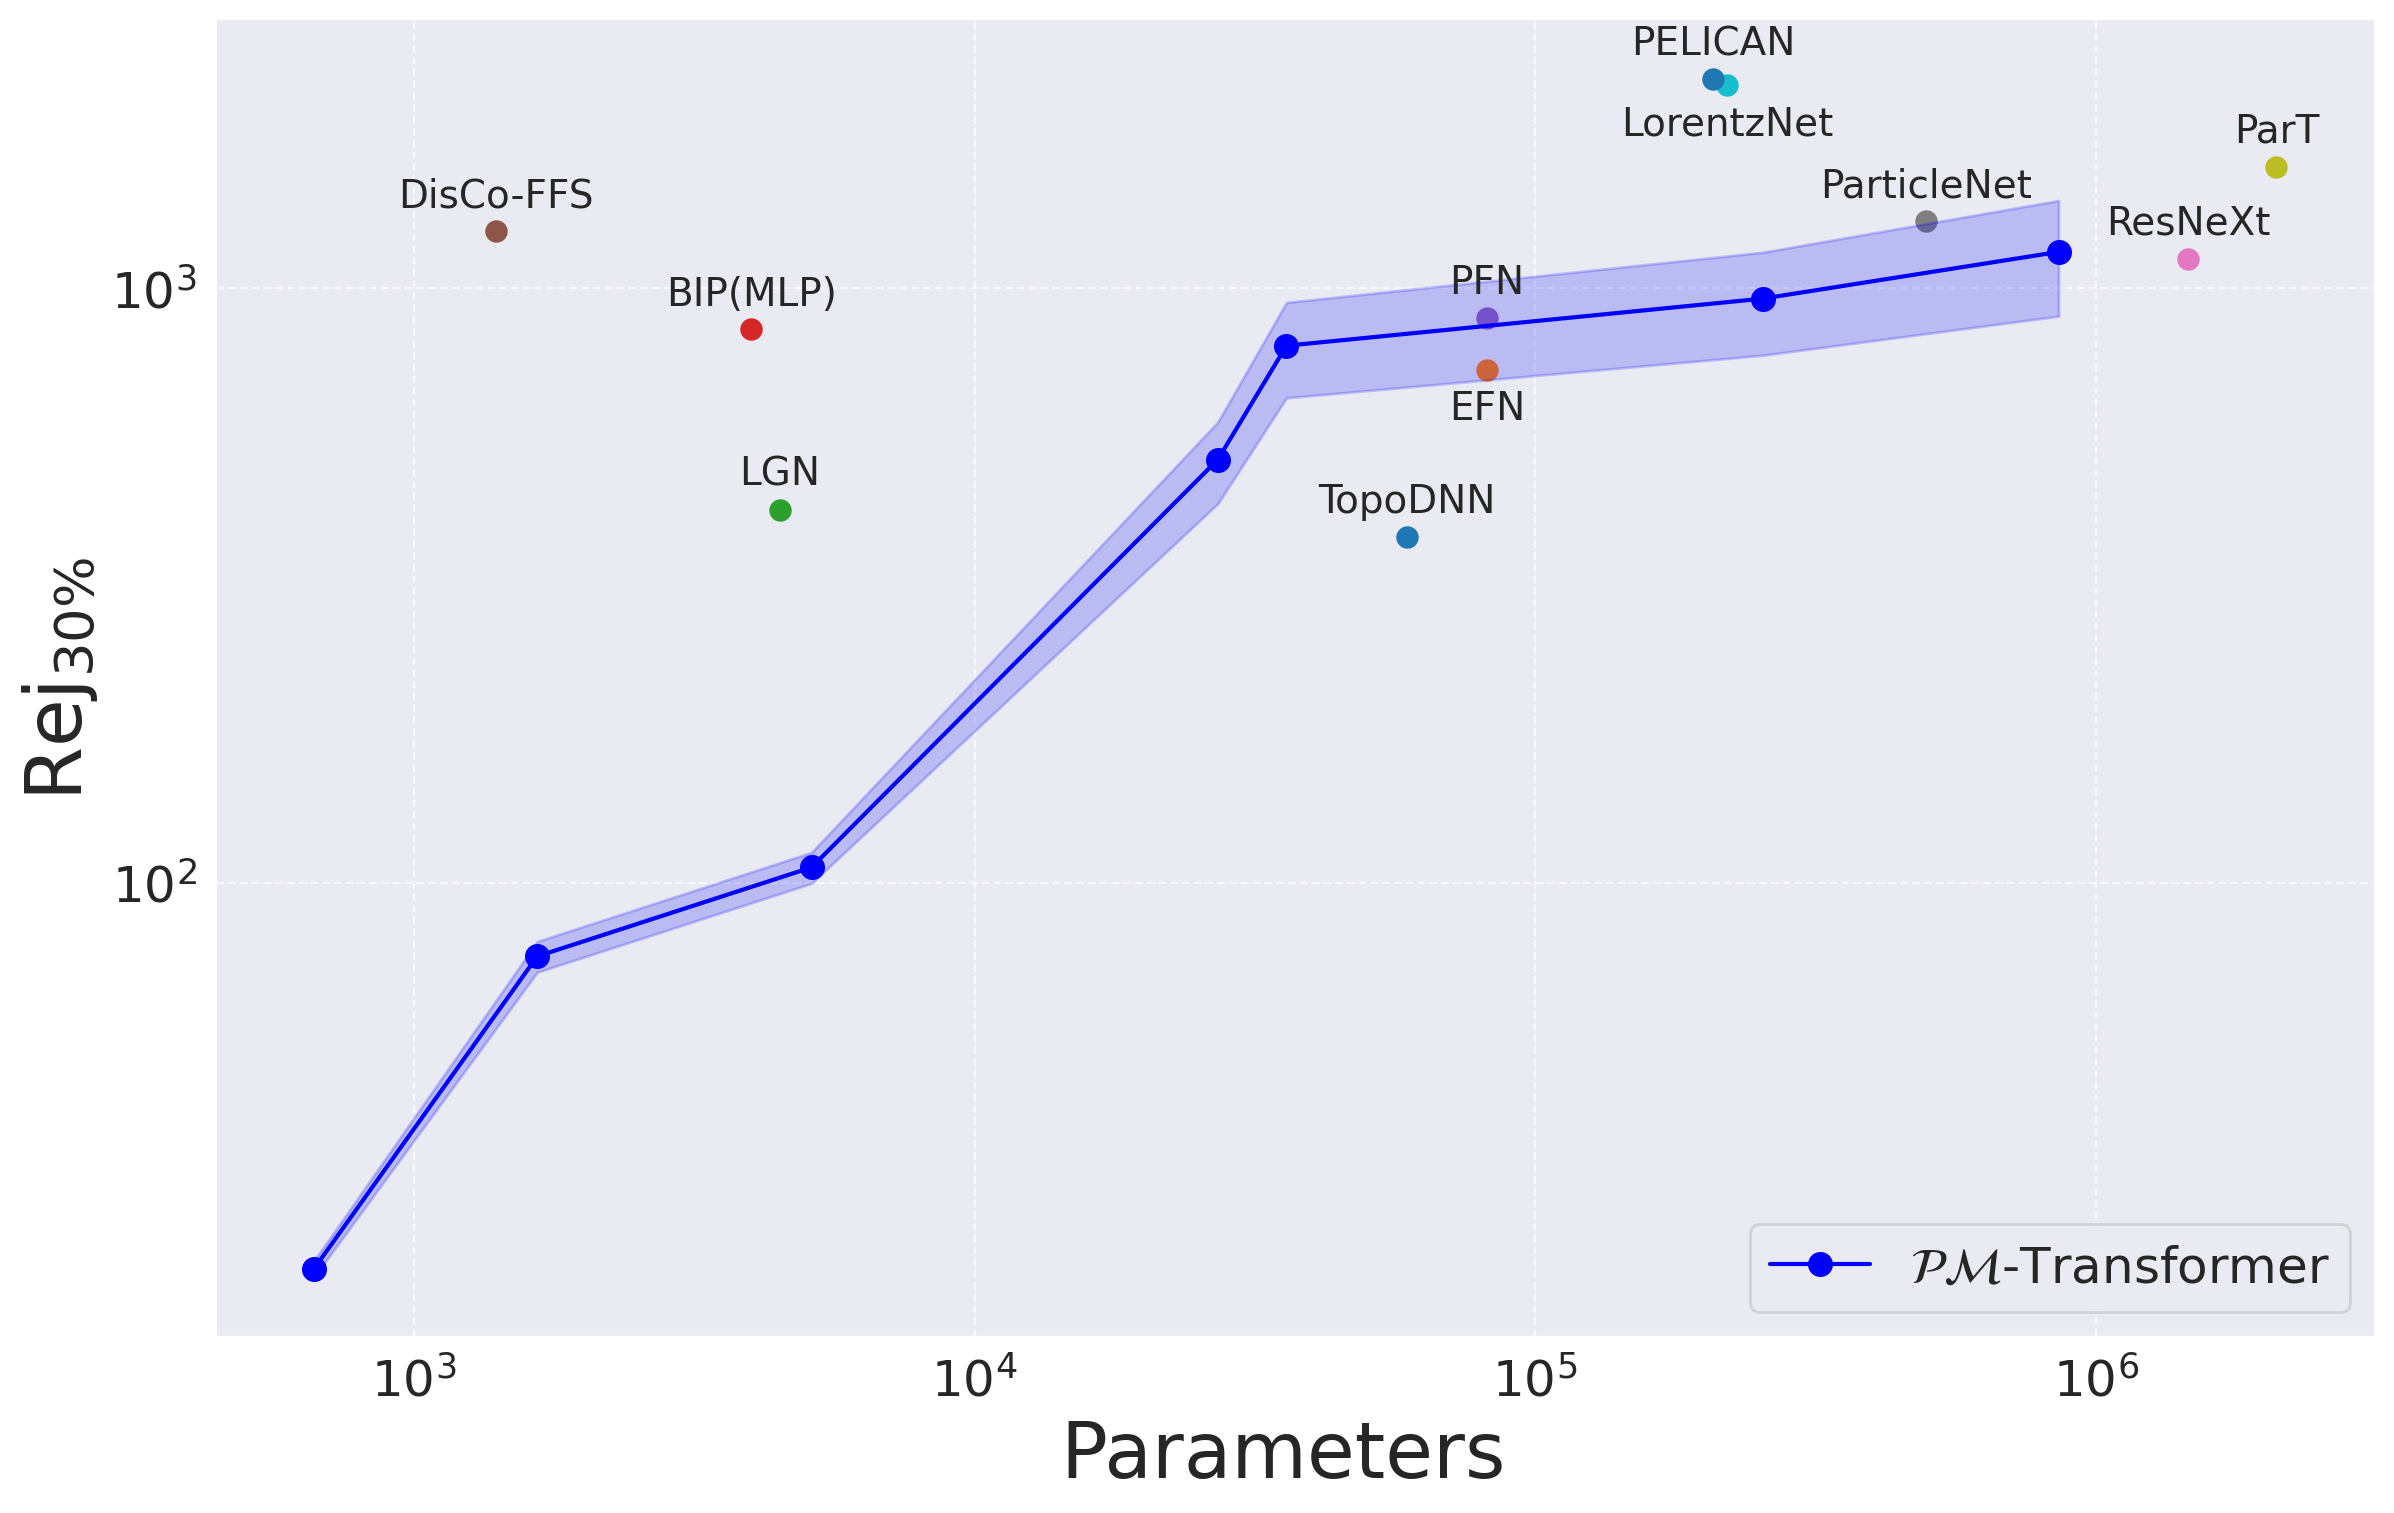

      params  overall_auc  accuracy_mean  overall_accuracy  accuracy_std  \
18     664.0     0.908910       0.861867          0.862156      0.001676   
10    1660.0     0.951785       0.899170          0.899128      0.001402   
9     5120.0     0.958407       0.903413          0.903520      0.001503   
5    27160.0     0.978248       0.926500          0.926507      0.001348   
7    36010.0     0.981249       0.930892          0.931064      0.001074   
19  254550.0     0.982586       0.934186          0.934178      0.001165   
28  858190.0     0.984272       0.937554          0.937700      0.001086   

    Top_rejection_50_mean  Top_rejection_50_std  Top_rejection_50_full  \
18              13.480469              0.291116              13.470812   
10              34.219623              1.336649              33.872505   
9               43.569433              1.742347              43.469107   
5              157.726561             12.725387             159.489731   
7              217.80

In [ ]:

# warnings.filterwarnings('ignore')
#

# Load the DataFrame
results_df = pd.read_csv('top_PMTrans_benchmark.csv').sort_values('overall_accuracy', ascending=False)

results_df['base_name'] = results_df['model_id'].str.split('batch128').str[1].str.split('_redo').str[0]

split_columns = results_df['base_name'].str.split('_final', expand=True)[0].str.split('_', expand=True).iloc[:, [1,2,3,4,7,8]]
results_df[['particle_geom', 'particle_dim','jet_geom','jet_dim','layers','heads']] = split_columns
results_df['layers'] = results_df['layers'].str[-1]
results_df['heads'] = results_df['heads'].str.split('nheads').str[1]


param_map = {'RxH_2_RxH_2_partD4_jetD4_layers1_nheads1': 664.0,
  'RxH_120_RxH_128_partD240_jetD256_layers4_nheads12': 1380000.0,
  'RxH_2_RxH_6_partD4_jetD12_layers2_nheads1': 1490.0,
  'RxH_4_RxH_4_partD8_jetD8_layers1_nheads1': 1660.0,
  'RxH_5_RxH_12_partD10_jetD24_layers2_nheads1': 5120.0,
  'RxH_120_RxH_128_partD240_jetD256_layers8_nheads12': 2029999.9999999998,
  'RxH_40_RxH_48_partD80_jetD96_layers8_nheads4': 254550.0,
  'RxH_10_RxH_24_partD20_jetD48_layers2_nheads1': 27160.0,
  'RxH_10_RxH_24_partD20_jetD48_layers8_nheads1': 36010.0,
  'RxH_20_RxH_32_partD40_jetD64_layers8_nheads2': 83380.0,
  'RxH_80_RxH_64_partD160_jetD128_layers8_nheads8': 858190.0} 

# Group by the columns and select the rows with the maximum 'overall_accuracy' for each group
best_rows_df = results_df.loc[results_df.groupby(['base_name'])['overall_accuracy'].idxmax()]
best_rows_df['params'] = best_rows_df['base_name'].str.split('PMTrans_').str[1].map(param_map)


result = best_rows_df.sort_values(by='params')[['params','overall_auc','accuracy_mean',
                                                'overall_accuracy','accuracy_std','Top_rejection_50_mean',
                                                'Top_rejection_50_std','Top_rejection_50_full','Top_rejection_30_full',
                                                'Top_rejection_30_mean','Top_rejection_30_std',
                                               'particle_geom', 'particle_dim','jet_geom','jet_dim','layers','heads']]
result= result[(result['params'] != 83380.0) & (result['params'] <= 1000000.0) & (result['params'] != 1490.0)]
# result= result[(result['params'] != 83380.0)]


# plt.figure(figsize =(10,6))
# plt.title('Top Tagging Val Accuracy')
# plt.ylabel('Val Acc')
# plt.xlabel('Model Trainable Parameters')
# plt.plot(result['params'].to_numpy(),result['val_acc'].to_numpy())
# plt.xscale('log')
# # plt.ylim(0.92,0.95)

# # plt.xlim(2*1e4,2*1e6)
# plt.show()

# Manually input the data
data = {
    "Architecture": [
        "TopoDNN", "EFN", "LGN",  "BIP(MLP)", 
        "PFN", "DisCo-FFS", "ResNeXt", "ParticleNet", "ParT", 
        "LorentzNet", "PELICAN", 
    ],
    "Accuracy": [
        0.916, 0.927, 0.929,   0.931, 
        0.932, None, 0.936, 0.938, 0.940, 0.942, 
        0.9426, 0.9406
    ],
    "Params": [
        59000, 82000, 4500,  4000, 
        82000, 1400, 1460000, 498000, 2100000, 
        220000, 208000, 208000
    ],
    "rej_30": [
        382, 729, 424, 853, 
        891, 1249, 1122, 1298, 1602, 2195, 
        2250
    ]
}

# Create the plot
fig = plt.figure(figsize=(12, 8),dpi =200)
for i, architecture in enumerate(data["Architecture"]):
    x = data["Params"][i]  # Convert parameters to thousands
    y = data["rej_30"][i]
    if y is not None:  # Skip missing accuracies
        plt.scatter(x, y,s = 50)
        if 'Loren' in architecture or 'EFN' in architecture:
            plt.text(x, y*0.825, architecture, fontsize=14, ha='center')
        else:
            plt.text(x, y*1.1, architecture, fontsize=14, ha='center')

# Formatting
plt.xlabel("Parameters ", fontsize=28)
plt.ylabel(f"$\\text{{Rej}}_{{30\%}}$", fontsize=28)
plt.plot(result['params'].to_numpy(),result['Top_rejection_30_mean'].to_numpy(),label = f'$\mathcal{{P}}\mathcal{{M}}$-Transformer',color = 'b',marker='o', markersize = 8)
plt.fill_between(result['params'].to_numpy(), 
                             (result['Top_rejection_30_mean'].to_numpy() - result['Top_rejection_30_std'].to_numpy()),
                             (result['Top_rejection_30_mean'].to_numpy() + result['Top_rejection_30_std'].to_numpy()), 
                             color='blue', alpha=0.2)
# plt.title("Top Tagging: Rej (at 0.3) vs. Parameters", fontsize=16)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xscale('log')
plt.tight_layout()
plt.yscale('log')
plt.legend(ncol = 1,fontsize = 18,loc = 'lower right')
ax = plt.gca()


ax.tick_params(axis='x', which='major', labelsize=18)
ax.tick_params(axis='y', which='major', labelsize=18)
fig.patch.set_facecolor('white')
# Show the plot
plt.show()

print(result)

In [ ]:
all_files = os.listdir()
gromov_output = []
for file in all_files: 
    if 'gromov' in file and 'csv' in file and 'bench' in file:
        gromov_output.append(file)

/tmp/ipykernel_629729/3483712952.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20')


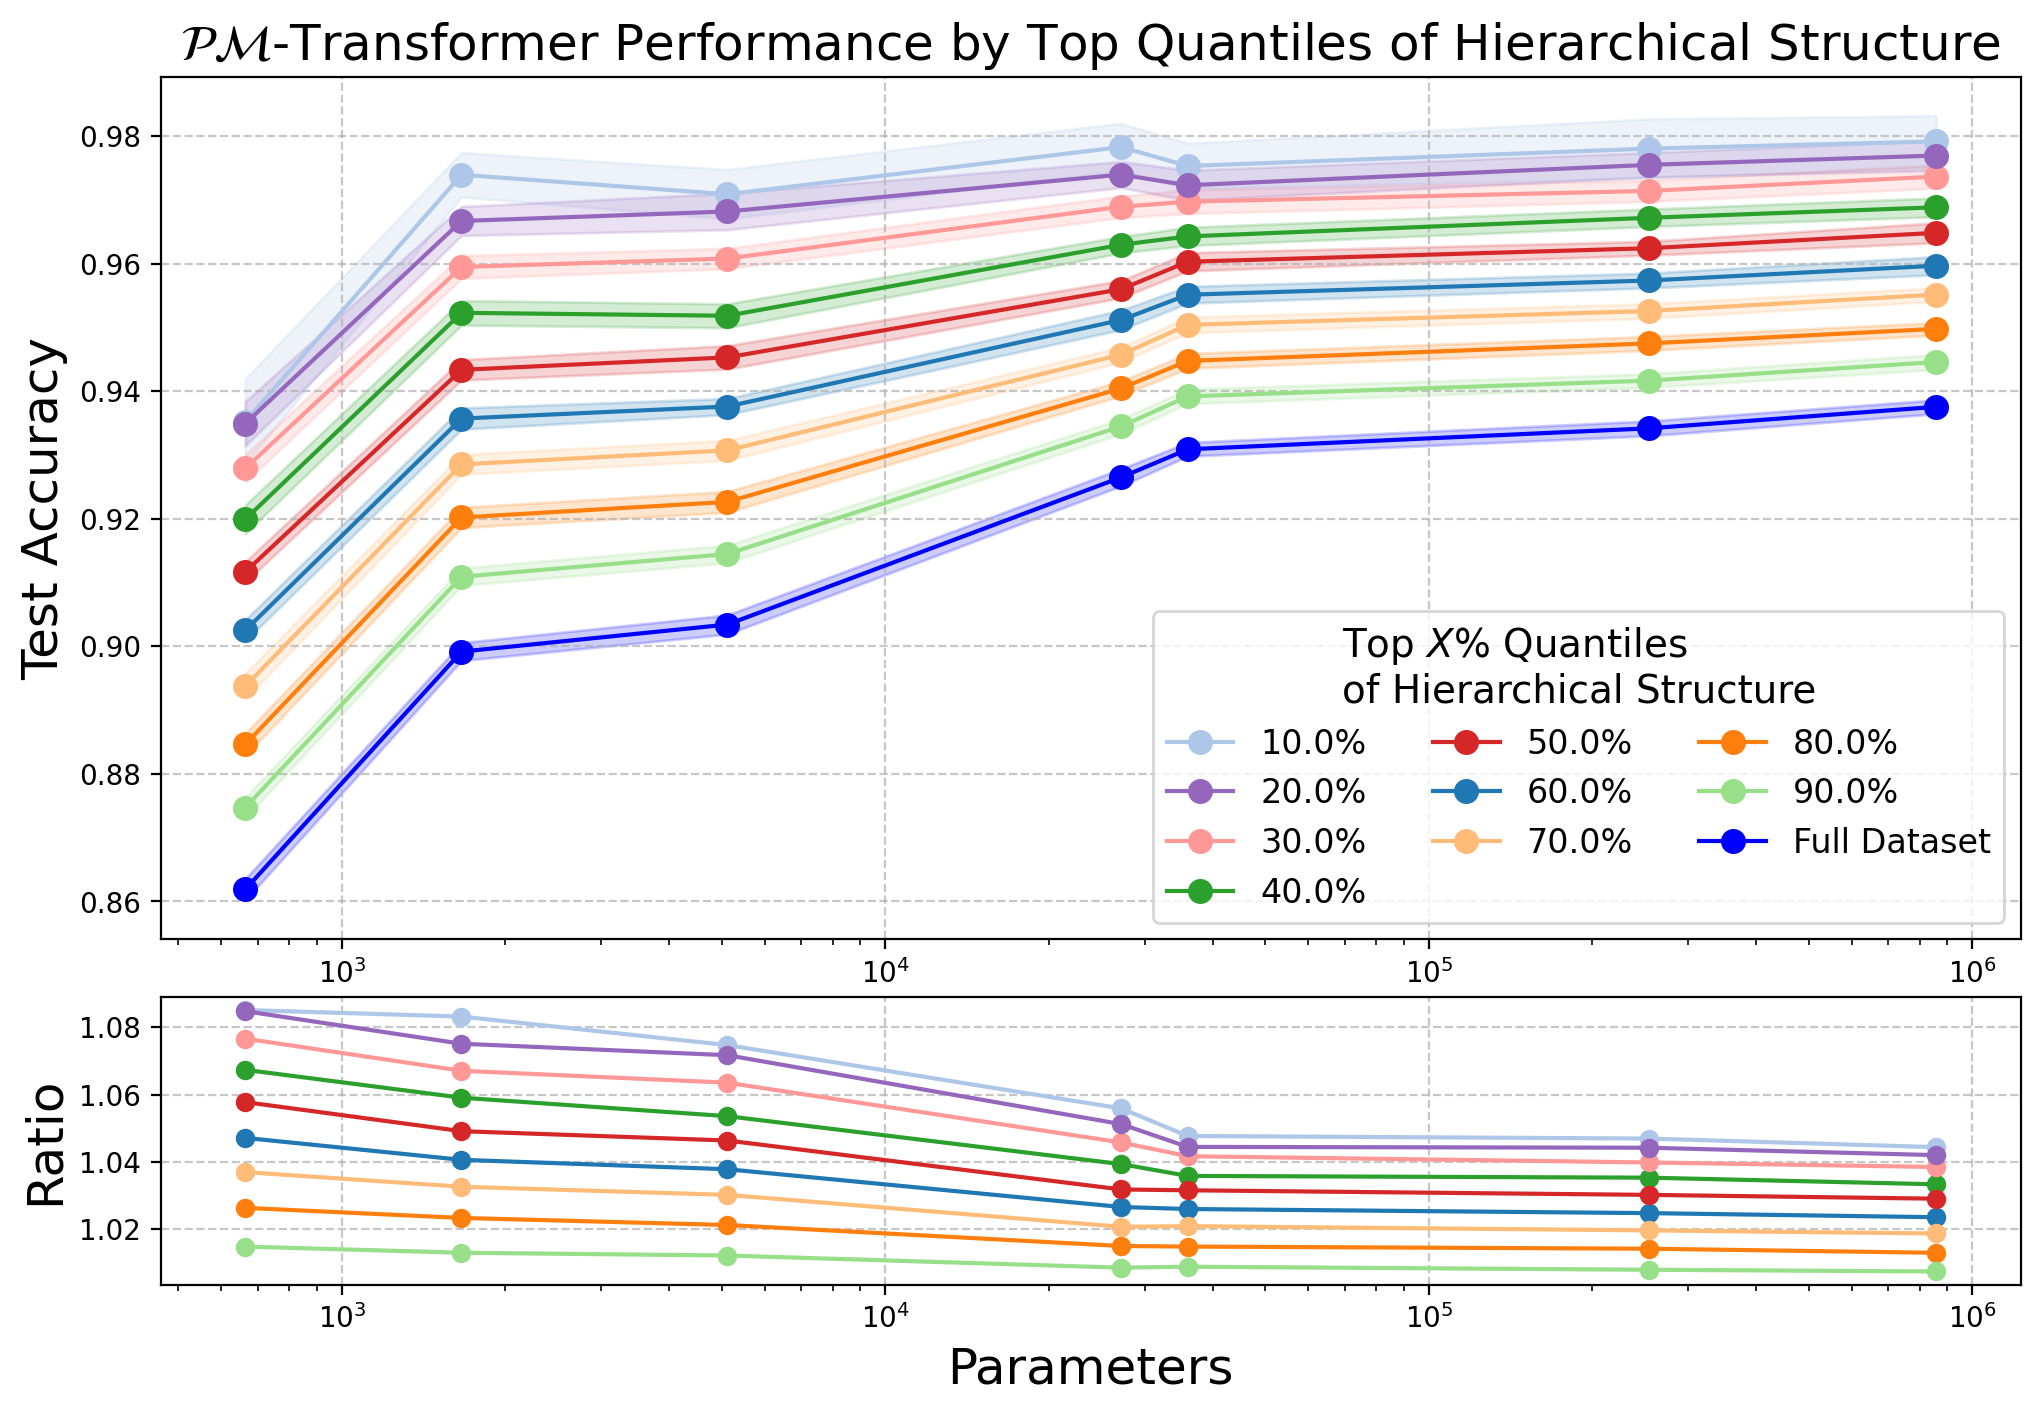

In [ ]:
# Full code integrating split plot for ratio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


param_map = {
    'RxH_2_RxH_2_partD4_jetD4_layers1_nheads1': 664.0,
    'RxH_120_RxH_128_partD240_jetD256_layers4_nheads12': 1380000.0,
    'RxH_2_RxH_6_partD4_jetD12_layers2_nheads1': 1490.0,
    'RxH_4_RxH_4_partD8_jetD8_layers1_nheads1': 1660.0,
    'RxH_5_RxH_12_partD10_jetD24_layers2_nheads1': 5120.0,
    'RxH_120_RxH_128_partD240_jetD256_layers8_nheads12': 2029999.9999999998,
    'RxH_40_RxH_48_partD80_jetD96_layers8_nheads4': 254550.0,
    'RxH_10_RxH_24_partD20_jetD48_layers2_nheads1': 27160.0,
    'RxH_10_RxH_24_partD20_jetD48_layers8_nheads1': 36010.0,
    'RxH_20_RxH_32_partD40_jetD64_layers8_nheads2': 83380.0,
    'RxH_80_RxH_64_partD160_jetD128_layers8_nheads8': 858190.0
}

# Define the figure and grid specification
fig = plt.figure(figsize=(12, 8), dpi=200)
gs = fig.add_gridspec(2, 1, height_ratios=[3,1], hspace=0.1)

# Main plot (accuracy vs. parameters)
ax1 = fig.add_subplot(gs[0])
cmap = plt.cm.get_cmap('tab20')
i = 0

# Iterate through gromov_output files
for file in gromov_output:
    if 'False' in file:
        continue

    cur_curv_percent = float(file.split('_')[-3])
    if cur_curv_percent > 95 or cur_curv_percent % 10 != 0:
        continue

    results_df = pd.read_csv(file).sort_values('overall_accuracy', ascending=False)
    results_df['base_name'] = results_df['model_id'].str.split('batch128').str[1].str.split('_redo').str[0]
    split_columns = results_df['base_name'].str.split('_final', expand=True)[0].str.split('_', expand=True).iloc[:, [1, 2, 3, 4, 7, 8]]
    results_df[['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim', 'layers', 'heads']] = split_columns
    results_df['layers'] = results_df['layers'].str[-1]
    results_df['heads'] = results_df['heads'].str.split('nheads').str[1]

    best_rows_df = results_df.loc[results_df.groupby(['base_name'])['overall_accuracy'].idxmax()]
    best_rows_df['params'] = best_rows_df['base_name'].str.split('PMTrans_').str[1].map(param_map)

    result = best_rows_df.sort_values(by='params')[['params', 'accuracy_mean', 'accuracy_std']]
    result= result[(result['params'] != 83380.0) & (result['params'] <= 1000000.0) & (result['params'] != 1490.0)]


    label = f"{100 - cur_curv_percent}%"
    ax1.plot(result['params'], result['accuracy_mean'], label=label, color=cmap(i / 19), marker='o', markersize=8)
    ax1.fill_between(result['params'], 
                     result['accuracy_mean'] - result['accuracy_std'], 
                     result['accuracy_mean'] + result['accuracy_std'], 
                     color=cmap(i / 19), alpha=0.2)
    i += 1

# Full dataset plot
full_results_df = pd.read_csv('top_PMTrans_benchmark.csv').sort_values('overall_accuracy', ascending=False)
full_results_df['base_name'] = full_results_df['model_id'].str.split('batch128').str[1].str.split('_redo').str[0]
split_columns = full_results_df['base_name'].str.split('_final', expand=True)[0].str.split('_', expand=True).iloc[:, [1, 2, 3, 4, 7, 8]]
full_results_df[['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim', 'layers', 'heads']] = split_columns
full_results_df['layers'] = full_results_df['layers'].str[-1]
full_results_df['heads'] = full_results_df['heads'].str.split('nheads').str[1]

best_full_rows_df = full_results_df.loc[full_results_df.groupby(['base_name'])['overall_accuracy'].idxmax()]
best_full_rows_df['params'] = best_full_rows_df['base_name'].str.split('PMTrans_').str[1].map(param_map)

full_result = best_full_rows_df.sort_values(by='params')[['params', 'accuracy_mean', 'accuracy_std']]

full_result= full_result[(full_result['params'] != 83380.0) & (full_result['params'] <= 1000000.0) & (full_result['params'] != 1490.0)]

ax1.plot(full_result['params'], full_result['accuracy_mean'], label='Full Dataset', color='b', marker='o', markersize=8)
ax1.fill_between(full_result['params'], 
                 full_result['accuracy_mean'] - full_result['accuracy_std'], 
                 full_result['accuracy_mean'] + full_result['accuracy_std'], 
                 color='b', alpha=0.2)

# Formatting for main plot
ax1.set_xscale('log')
ax1.set_ylabel("Test Accuracy", fontsize=18)
handles, labels = plt.gca().get_legend_handles_labels()

# Define a sorting key
def sorting_key(hl):
    handle, label = hl
    try:
        return (0, int(label))  # Sort numeric labels by their value
    except ValueError:
        return (1, label)       # Non-numeric labels go to the bottom

# Sort handles and labels
sorted_handles_labels = sorted(zip(handles, labels), key=sorting_key)
sorted_handles, sorted_labels = zip(*sorted_handles_labels)

# Add sorted legend
plt.legend(sorted_handles, sorted_labels, ncol=3, 
           fontsize=12, loc='lower right',
           title = f'Top $X$% Quantiles \nof Hierarchical Structure',
           title_fontsize = 14)


# plt.legend(ncol = 1,fontsize = 18,loc = 'lower right')
plt.title(
    r'$\mathcal{P}\mathcal{M}$-Transformer Performance by Top Quantiles of Hierarchical Structure',
    fontsize=18,  # Adjust fontsize as needed
    wrap=True     # Optional: enables auto-wrapping for long titles
)
ax1.grid(True, linestyle="--", alpha=0.7)



# Ratio plot (below the main plot)
ax2 = fig.add_subplot(gs[1], sharex=ax1)

# Reset color iterator for consistent colors in lower plot
i = 0

for file in gromov_output:
    if 'False' in file:
        continue

    cur_curv_percent = float(file.split('_')[-3])
    if cur_curv_percent > 95 or cur_curv_percent % 10 != 0:
        continue

    results_df = pd.read_csv(file).sort_values('overall_accuracy', ascending=False)
    results_df['base_name'] = results_df['model_id'].str.split('batch128').str[1].str.split('_redo').str[0]
    split_columns = results_df['base_name'].str.split('_final', expand=True)[0].str.split('_', expand=True).iloc[:, [1, 2, 3, 4, 7, 8]]
    results_df[['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim', 'layers', 'heads']] = split_columns
    results_df['layers'] = results_df['layers'].str[-1]
    results_df['heads'] = results_df['heads'].str.split('nheads').str[1]

    best_rows_df = results_df.loc[results_df.groupby(['base_name'])['overall_accuracy'].idxmax()]
    best_rows_df['params'] = best_rows_df['base_name'].str.split('PMTrans_').str[1].map(param_map)

    result = best_rows_df.sort_values(by='params')[['params','auc_mean','auc_std', 'accuracy_mean', 'accuracy_std','Top_rejection_30_mean','Top_rejection_30_std']]
    result= result[(result['params'] != 83380.0) & (result['params'] <= 1000000.0) & (result['params'] != 1490.0)]

    
    # Compute the ratio
    try:
        ratio = result['accuracy_mean'] / np.interp(result['params'], full_result['params'], full_result['accuracy_mean'])
    except Exception as e:
        print(f"Error computing ratio for {file}: {e}")
        continue

    # Plot the ratio
    ax2.plot(result['params'], ratio, label=f"{100 - cur_curv_percent}%", color=cmap(i / 19), marker='o', markersize=6)
    i += 1
#     print(f'{100 - cur_curv_percent}')
#     print(result)

# Formatting for ratio plot
ax2.set_xscale('log')
ax2.set_xlabel("Parameters", fontsize=18)
ax2.set_ylabel("Ratio", fontsize=18)
ax2.grid(True, linestyle="--", alpha=0.7)

# Set figure background
fig.patch.set_facecolor('white')

# Show the plot
plt.show()


/tmp/ipykernel_629729/4034895078.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20')


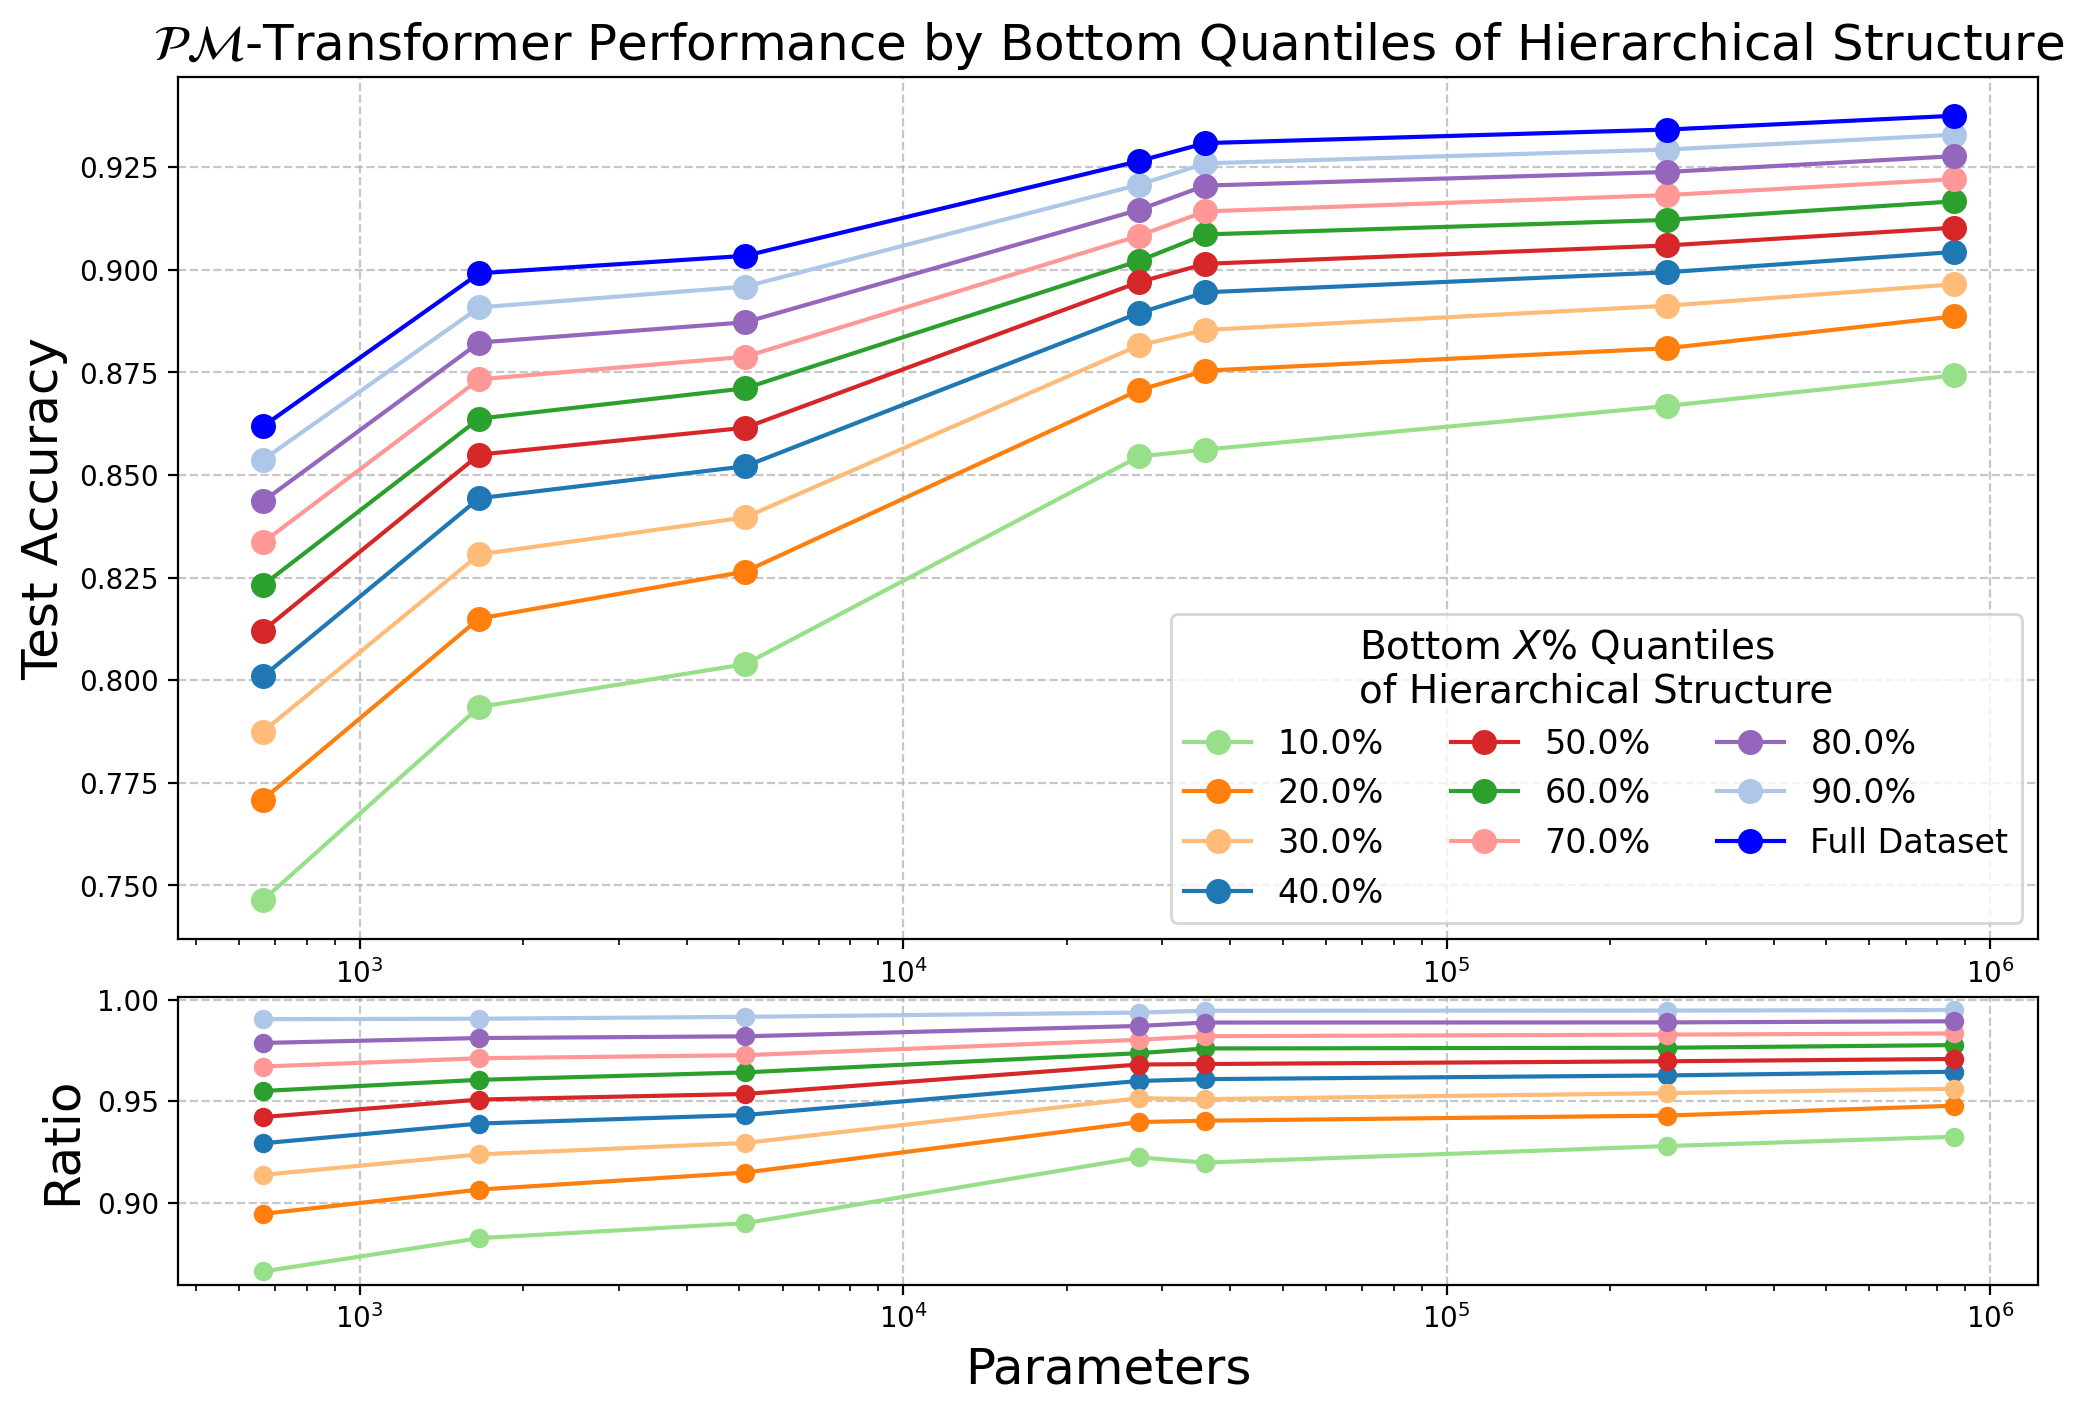

In [ ]:
# Full code integrating split plot for ratio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


param_map = {
    'RxH_2_RxH_2_partD4_jetD4_layers1_nheads1': 664.0,
    'RxH_120_RxH_128_partD240_jetD256_layers4_nheads12': 1380000.0,
    'RxH_2_RxH_6_partD4_jetD12_layers2_nheads1': 1490.0,
    'RxH_4_RxH_4_partD8_jetD8_layers1_nheads1': 1660.0,
    'RxH_5_RxH_12_partD10_jetD24_layers2_nheads1': 5120.0,
    'RxH_120_RxH_128_partD240_jetD256_layers8_nheads12': 2029999.9999999998,
    'RxH_40_RxH_48_partD80_jetD96_layers8_nheads4': 254550.0,
    'RxH_10_RxH_24_partD20_jetD48_layers2_nheads1': 27160.0,
    'RxH_10_RxH_24_partD20_jetD48_layers8_nheads1': 36010.0,
    'RxH_20_RxH_32_partD40_jetD64_layers8_nheads2': 83380.0,
    'RxH_80_RxH_64_partD160_jetD128_layers8_nheads8': 858190.0
}

# Define the figure and grid specification
fig = plt.figure(figsize=(12, 8), dpi=200)
gs = fig.add_gridspec(2, 1, height_ratios=[3,1], hspace=0.1)

# Main plot (accuracy vs. parameters)
ax1 = fig.add_subplot(gs[0])
cmap = plt.cm.get_cmap('tab20')
i = 0

# Iterate through gromov_output files
for file in gromov_output:
    if 'False' in file:
        continue

    cur_curv_percent = float(file.split('_')[-3])
    if cur_curv_percent > 95 or cur_curv_percent % 10 != 0:
        continue

    results_df = pd.read_csv(file).sort_values('overall_accuracy', ascending=False)
    results_df['base_name'] = results_df['model_id'].str.split('batch128').str[1].str.split('_redo').str[0]
    split_columns = results_df['base_name'].str.split('_final', expand=True)[0].str.split('_', expand=True).iloc[:, [1, 2, 3, 4, 7, 8]]
    results_df[['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim', 'layers', 'heads']] = split_columns
    results_df['layers'] = results_df['layers'].str[-1]
    results_df['heads'] = results_df['heads'].str.split('nheads').str[1]

    best_rows_df = results_df.loc[results_df.groupby(['base_name'])['overall_accuracy'].idxmax()]
    best_rows_df['params'] = best_rows_df['base_name'].str.split('PMTrans_').str[1].map(param_map)

    result = best_rows_df.sort_values(by='params')[['params', 'accuracy_mean', 'accuracy_std']]
    result= result[(result['params'] != 83380.0) & (result['params'] <= 1000000.0) & (result['params'] != 1490.0)]


    label = f"{cur_curv_percent}%"
    top_n = 100 - cur_curv_percent
    acc_on_removed= (full_result['accuracy_mean'].to_numpy() -result['accuracy_mean'].to_numpy()*((top_n)/100))/((100-top_n)/100)
    
    
    ax1.plot(result['params'], acc_on_removed, label=label, color=cmap(i / 19), marker='o', markersize=8)
    i += 1

# Full dataset plot
full_results_df = pd.read_csv('top_PMTrans_benchmark.csv').sort_values('overall_accuracy', ascending=False)
full_results_df['base_name'] = full_results_df['model_id'].str.split('batch128').str[1].str.split('_redo').str[0]
split_columns = full_results_df['base_name'].str.split('_final', expand=True)[0].str.split('_', expand=True).iloc[:, [1, 2, 3, 4, 7, 8]]
full_results_df[['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim', 'layers', 'heads']] = split_columns
full_results_df['layers'] = full_results_df['layers'].str[-1]
full_results_df['heads'] = full_results_df['heads'].str.split('nheads').str[1]

best_full_rows_df = full_results_df.loc[full_results_df.groupby(['base_name'])['overall_accuracy'].idxmax()]
best_full_rows_df['params'] = best_full_rows_df['base_name'].str.split('PMTrans_').str[1].map(param_map)

full_result = best_full_rows_df.sort_values(by='params')[['params', 'accuracy_mean', 'accuracy_std']]

full_result= full_result[(full_result['params'] != 83380.0) & (full_result['params'] <= 1000000.0) & (full_result['params'] != 1490.0)]

ax1.plot(full_result['params'], full_result['accuracy_mean'], label='Full Dataset', color='b', marker='o', markersize=8)


# Formatting for main plot
ax1.set_xscale('log')
ax1.set_ylabel("Test Accuracy", fontsize=18)
handles, labels = plt.gca().get_legend_handles_labels()

# Define a sorting key
def sorting_key(hl):
    handle, label = hl
    try:
        return (0, int(label))  # Sort numeric labels by their value
    except ValueError:
        return (1, label)       # Non-numeric labels go to the bottom

# Sort handles and labels
sorted_handles_labels = sorted(zip(handles, labels), key=sorting_key)
sorted_handles, sorted_labels = zip(*sorted_handles_labels)

# Add sorted legend
plt.legend(sorted_handles, sorted_labels, ncol=3, 
           fontsize=12, loc='lower right',
           title = f'Bottom $X$% Quantiles \nof Hierarchical Structure',
           title_fontsize = 14)


# plt.legend(ncol = 1,fontsize = 18,loc = 'lower right')
plt.title(
    r'$\mathcal{P}\mathcal{M}$-Transformer Performance by Bottom Quantiles of Hierarchical Structure',
    fontsize=18,  # Adjust fontsize as needed
    wrap=True     # Optional: enables auto-wrapping for long titles
)
ax1.grid(True, linestyle="--", alpha=0.7)



# Ratio plot (below the main plot)
ax2 = fig.add_subplot(gs[1], sharex=ax1)

# Reset color iterator for consistent colors in lower plot
i = 0

for file in gromov_output:
    if 'False' in file:
        continue

    cur_curv_percent = float(file.split('_')[-3])
    if cur_curv_percent > 95 or cur_curv_percent % 10 != 0:
        continue

    results_df = pd.read_csv(file).sort_values('overall_accuracy', ascending=False)
    results_df['base_name'] = results_df['model_id'].str.split('batch128').str[1].str.split('_redo').str[0]
    split_columns = results_df['base_name'].str.split('_final', expand=True)[0].str.split('_', expand=True).iloc[:, [1, 2, 3, 4, 7, 8]]
    results_df[['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim', 'layers', 'heads']] = split_columns
    results_df['layers'] = results_df['layers'].str[-1]
    results_df['heads'] = results_df['heads'].str.split('nheads').str[1]

    best_rows_df = results_df.loc[results_df.groupby(['base_name'])['overall_accuracy'].idxmax()]
    best_rows_df['params'] = best_rows_df['base_name'].str.split('PMTrans_').str[1].map(param_map)

    result = best_rows_df.sort_values(by='params')[['params','auc_mean','auc_std', 'accuracy_mean', 'accuracy_std','Top_rejection_30_mean','Top_rejection_30_std']]
    result= result[(result['params'] != 83380.0) & (result['params'] <= 1000000.0) & (result['params'] != 1490.0)]
    
    top_n = 100 - cur_curv_percent
    acc_on_removed= (full_result['accuracy_mean'].to_numpy() -result['accuracy_mean'].to_numpy()*((top_n)/100))/((100-top_n)/100)
    # Compute the ratio
    try:
        ratio = acc_on_removed / np.interp(result['params'], full_result['params'], full_result['accuracy_mean'])
    except Exception as e:
        print(f"Error computing ratio for {file}: {e}")
        continue

    # Plot the ratio
    ax2.plot(result['params'], ratio, label=f"{cur_curv_percent}%", color=cmap(i / 19), marker='o', markersize=6)
    i += 1
#     print(f'{100 - cur_curv_percent}')
#     print(result)

# Formatting for ratio plot
ax2.set_xscale('log')
ax2.set_xlabel("Parameters", fontsize=18)
ax2.set_ylabel("Ratio", fontsize=18)
ax2.grid(True, linestyle="--", alpha=0.7)

# Set figure background
fig.patch.set_facecolor('white')

# Show the plot
plt.show()


### Quark vs Gluon Gromov Delta Calculation

In [30]:
# Load the CSV files
gromov_data_0 = pd.read_csv('QvG_Euclidean_gromov_delta_results_0.csv')
gromov_data_1 = pd.read_csv('QvG_Euclidean_gromov_delta_results_1.csv')

# Concatenate the dataframes
gromov_data = pd.concat([gromov_data_0, gromov_data_1], ignore_index=True)

gromov_data_0 = pd.read_csv('QvG_EMD_gromov_delta_results_0.csv')
gromov_data_1 = pd.read_csv('QvG_EMD_gromov_delta_results_1.csv')

# Concatenate the dataframes
gromov_data_EMD = pd.concat([gromov_data_0, gromov_data_1], ignore_index=True)

gromov_data_0 = pd.read_csv('QvG_normalized_EMD_gromov_delta_results_0.csv')
gromov_data_1 = pd.read_csv('QvG_normalized_EMD_gromov_delta_results_1.csv')

# Concatenate the dataframes
gromov_data_norm_EMD = pd.concat([gromov_data_0, gromov_data_1], ignore_index=True)

In [ ]:
top_jets = gromov_data[gromov_data['jet_label']==1]
qcd_jets = gromov_data[gromov_data['jet_label']==0]

plot_gromov_hist(top_jets['rel_delta'], qcd_jets['rel_delta'], 'Quark', 'Gluon','Euclidean Gromov-$\delta$')

top_jets = gromov_data_EMD[gromov_data['jet_label']==1]
qcd_jets = gromov_data_EMD[gromov_data['jet_label']==0]

plot_gromov_hist(top_jets['delta'], qcd_jets['delta'], 'Quark', 'Gluon','EMD Gromov-$\delta$')


top_jets = gromov_data_norm_EMD[gromov_data['jet_label']==1]
qcd_jets = gromov_data_norm_EMD[gromov_data['jet_label']==0]

plot_gromov_hist(top_jets['delta'], qcd_jets['delta'], 'Quark', 'Gluon','Normalized EMD Gromov-$\delta$')


In [ ]:
plot_gromov_heatmap(gromov_data['rel_delta'], gromov_data['jet_eta'], f'Jet $\\eta$', f'Gromov-$\\delta$',f'Jet $\\eta$ vs Gromov-$\\delta$')

plot_gromov_heatmap(gromov_data_EMD['delta'], gromov_data_EMD['jet_eta'], f'Jet $\\eta$', f'EMD Gromov-$\\delta$',f'Jet $\\eta$ vs EMD Gromov-$\\delta$')

plot_gromov_heatmap(gromov_data_norm_EMD['delta'], gromov_data_norm_EMD['jet_eta'], f'Jet $\\eta$', f'EMD normalized Gromov-$\\delta$',f'Jet $\\eta$ vs normalized EMD Gromov-$\\delta$')



In [ ]:
plot_gromov_heatmap(gromov_data['rel_delta'], gromov_data['jet_pt'], f'Jet $\\eta$', f'Gromov-$\\delta$',f'Jet $p_T$ vs Gromov-$\\delta$')

plot_gromov_heatmap(gromov_data_EMD['delta'], gromov_data_EMD['jet_pt'],  f'Jet $\\eta$', f'EMD Gromov-$\\delta$',f'Jet $p_T$ vs EMD Gromov-$\\delta$')

plot_gromov_heatmap(gromov_data_norm_EMD['delta'], gromov_data_norm_EMD['jet_pt'], f'Jet $\\eta$', f'Normalized EMD Gromov-$\\delta$',f'Jet $p_T$ vs Normalized EMD Gromov-$\\delta$')

In [ ]:
plot_gromov_heatmap(gromov_data['rel_delta'], gromov_data['jet_nparts'], f'Number of Particles', f'Gromov-$\\delta$',f'Number of Particles vs Gromov-$\\delta$')

plot_gromov_heatmap(gromov_data_EMD['delta'], gromov_data_EMD['jet_pt'],  f'Jet $\\eta$', f'EMD Gromov-$\\delta$',f'Jet $p_T$ vs EMD Gromov-$\\delta$')

plot_gromov_heatmap(gromov_data_norm_EMD['delta'], gromov_data_norm_EMD['jet_pt'], f'Jet $\\eta$', f'EMD Gromov-$\\delta$',f'Jet $p_T$ vs EMD Gromov-$\\delta$')

